In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = 'Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(csv_path, encoding= 'unicode_escape')
df.head(2)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1.0


In [3]:
#Vemos la cantidad de columnas
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

### _Observamos los tipos de datos_
#### En el CSV la mayoria de valores despues de la columa ISRC estan en comillas, por lo que se le considera un valor 'object' (son cadenas de texto)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   object 
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   object 
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

##### La funcion describe generara una descripcion estadistica de los valores numericos.
###### Sin embargo como se nota, solo describe 4 columnas esto se debe a que en el dataframe las restantes son de tipo object pese a que su 'naturaleza' es de valor numerico, ya sea el numero de vistas, ranking, etc.

In [5]:
df.describe()

,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4038.000000,3678.000000,3545.000000,0.0,4599.000000
mean,54.614908,32.319467,25.348942,NaN,0.358991
std,71.617219,54.279461,25.989826,NaN,0.479757
min,1.000000,1.000000,1.000000,NaN,0.000000
25%,10.000000,5.000000,8.000000,NaN,0.000000
50%,28.000000,15.000000,17.000000,NaN,0.000000
75%,70.000000,37.000000,34.000000,NaN,1.000000
max,859.000000,632.000000,210.000000,NaN,1.000000


##### Es necesario convertir los valores de tipo object a sus valores 'reales' por eso es necesario convertirlos, sea el caso del dato Release date es necesario convertirlo en tipo fecha, para poder manipularlos de mejor manera proximamente.

In [6]:
import re

# Convertir columnas numéricas que están en formato de texto a numérico
numeric_columns = [
    'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts','Deezer Playlist Reach' ,'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count'
]

# Convertir a string, reemplazar caracteres no numéricos, y luego a numérico
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('"', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Convertir 'Release Date' a tipo datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Convertir 'Explicit Track' a booleano
df['Explicit Track'] = df['Explicit Track'].astype('bool')

# Mostrar información general del DataFrame después de la conversión
print("\nInformación general del DataFrame después de la conversión:")
print(df.info())


Información general del DataFrame después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4599 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       


In [7]:
df.head(2)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,True


In [8]:
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity
count,4.600000e+03,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.427000e+03,3.620000e+03,...,4.103000e+03,2478.000000,3678.000000,3.671000e+03,3545.000000,3.494000e+03,3.333000e+03,1.267000e+03,4.023000e+03,0.0
mean,2.645311e+04,44.331587,4.473640e+08,59388.313687,2.337424e+07,162.769758,4.027663e+08,2.930160e+06,9.534735e+05,1.126394e+08,...,5.512572e+04,257.679984,32.319467,1.295291e+06,25.348942,8.566735e+07,8.791310e+04,1.484797e+07,2.529097e+06,NaN
std,1.638797e+06,172.778995,5.384607e+08,71133.303832,2.972897e+07,6116.158088,7.019146e+08,4.593585e+06,2.497015e+06,5.498119e+08,...,1.279051e+05,554.876901,54.279461,3.555963e+06,25.989826,1.678785e+08,2.608229e+05,3.213281e+07,6.038807e+06,NaN
min,1.000000e+00,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,NaN
25%,1.144750e+03,23.300000,7.035288e+07,6699.000000,4.791612e+06,61.000000,4.064985e+07,4.099500e+05,3.818650e+04,5.825262e+06,...,4.780000e+02,25.000000,5.000000,5.226800e+04,8.000000,1.057955e+06,1.262000e+03,7.684075e+05,2.301950e+05,NaN
50%,2.290500e+03,29.900000,2.398507e+08,32312.500000,1.326411e+07,67.000000,1.482696e+08,1.257935e+06,1.825290e+05,2.653441e+07,...,5.950000e+03,86.000000,15.000000,2.374060e+05,17.000000,1.273577e+07,7.832000e+03,3.224599e+06,8.545840e+05,NaN
75%,3.436250e+03,44.500000,6.283638e+08,86038.750000,2.968632e+07,73.000000,4.647882e+08,3.573193e+06,7.958015e+05,9.328418e+07,...,4.640300e+04,256.500000,37.000000,9.065735e+05,34.000000,8.150121e+07,4.956300e+04,1.338760e+07,2.684638e+06,NaN
max,1.111509e+08,11465.000000,4.281469e+09,590392.000000,2.623434e+08,376889.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,NaN


##### VERIFICAR DUPLICIDAD, VALORES NULOS, VACIOS, INELEGIBLES

In [9]:
# Verificar y manejar duplicados
print("\nNúmero de duplicados antes de eliminar:")
print(df.duplicated().sum())


Número de duplicados antes de eliminar:
2


In [10]:
# Eliminar duplicados
df = df.drop_duplicates()

In [11]:
print("\nNúmero de duplicados después de eliminar:")
print(df.duplicated().sum())


Número de duplicados después de eliminar:
0


In [12]:
# Verificar y manejar valores nulos
print("\nValores nulos por columna antes de manejar:")
print(df.isnull().sum())


Valores nulos por columna antes de manejar:
Track                            0
Album Name                       0
Artist                           5
Release Date                     1
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1010
Apple Music Playlist Count     562
AirPlay Spins                  497
SiriusXM Spins                2122
Deezer Playlist Count          922
Deezer Playlist Reach          929
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1267
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popu

##### Antes de tomar una decisión sobre cómo manejar valores nulos en el dataset, es crucial entender la naturaleza de los datos y la importancia de cada columna en el contexto del análisis. Este dataset contiene métricas de canciones de artistas, incluyendo información sobre el nombre del artista, el álbum, la fecha de lanzamiento, y diversas métricas de popularidad y desempeño en plataformas como Spotify, YouTube, y TikTok. 

###### Columnas Críticas (No rellenables): 
###### Track Name: Nombre de la canción.
###### Album Name: Nombre del álbum al que pertenece la canción.
###### Artist: Nombre del artista o artistas.
###### Release Date: Fecha de lanzamiento de la canción.
###### ISRC: Código de grabación estándar internacional.
##### Estas columnas contienen información esencial que no puede ser rellenada de manera razonable. Si alguna fila carece de datos en alguna de estas columnas, esa fila debe ser eliminada, ya que estos datos son fundamentales para la identificación y el análisis de las canciones.

In [13]:
# Manejar valores nulos: decisión de eliminar o rellenar
# Ejemplo: Eliminar filas con valores nulos en columnas críticas
df = df.dropna(subset=['Track', 'Artist', 'Release Date'])
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           0
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                108
Spotify Playlist Count          65
Spotify Playlist Reach          67
Spotify Popularity             799
YouTube Views                  303
YouTube Likes                  310
TikTok Posts                  1168
TikTok Likes                   975
TikTok Views                   976
YouTube Playlist Reach        1004
Apple Music Playlist Count     556
AirPlay Spins                  492
SiriusXM Spins                2117
Deezer Playlist Count          916
Deezer Playlist Reach          923
Amazon Playlist Count         1049
Pandora Streams               1100
Pandora Track Stations        1262
Soundcloud Streams            3326
Shazam Counts                  576
TIDAL Popularity              4592
Explicit Track      

##### RELLENAMOS LOS VALORES FALTANTES CON ALGUNAS TECNICAS (EN ESTE CASO LA MAS SIMPLE)

In [14]:
# Rellenar valores nulos en columnas categóricas con 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

In [15]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           0
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                108
Spotify Playlist Count          65
Spotify Playlist Reach          67
Spotify Popularity             799
YouTube Views                  303
YouTube Likes                  310
TikTok Posts                  1168
TikTok Likes                   975
TikTok Views                   976
YouTube Playlist Reach        1004
Apple Music Playlist Count     556
AirPlay Spins                  492
SiriusXM Spins                2117
Deezer Playlist Count          916
Deezer Playlist Reach          923
Amazon Playlist Count         1049
Pandora Streams               1100
Pandora Track Stations        1262
Soundcloud Streams            3326
Shazam Counts                  576
TIDAL Popularity              4592
Explicit Track      

##### En el CSV se observan valores inelegibles por lo que es imposible saber que informacion tiene, asi que se eliminaran las filas con valores inelegibles. Asi mismo observamos que la columna TIDAL popularity no tienen ninguna informacion. Entonces, que se hace con estos datos que no aportan nada? Obviamente se elimina

In [16]:
# Identificar y manejar valores vacíos o ilegibles
def contains_invalid_chars(s):
    invalid_chars = re.compile(r'[^\x00-\x7F]+')  # Caracteres no ASCII
    return bool(invalid_chars.search(s))

# Aplicar la función a las columnas relevantes
columns_to_check = ['Track', 'Album Name', 'Artist']
df = df[~df[columns_to_check].applymap(contains_invalid_chars).any(axis=1)]

# Mostrar información general del DataFrame después de la limpieza
print("\nInformación general del DataFrame después de la limpieza:")
df.info()


Información general del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4598
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       3999 non-null   object        
 1   Album Name                  3999 non-null   object        
 2   Artist                      3999 non-null   object        
 3   Release Date                3999 non-null   datetime64[ns]
 4   ISRC                        3999 non-null   object        
 5   All Time Rank               3999 non-null   int64         
 6   Track Score                 3999 non-null   float64       
 7   Spotify Streams             3903 non-null   float64       
 8   Spotify Playlist Count      3941 non-null   float64       
 9   Spotify Playlist Reach      3939 non-null   float64       
 10  Spotify Popularity          3297 non-null   float64       
 1

In [17]:
# Eliminar la columna "TIDAL Popularity"
df = df.drop(columns=['TIDAL Popularity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4598
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       3999 non-null   object        
 1   Album Name                  3999 non-null   object        
 2   Artist                      3999 non-null   object        
 3   Release Date                3999 non-null   datetime64[ns]
 4   ISRC                        3999 non-null   object        
 5   All Time Rank               3999 non-null   int64         
 6   Track Score                 3999 non-null   float64       
 7   Spotify Streams             3903 non-null   float64       
 8   Spotify Playlist Count      3941 non-null   float64       
 9   Spotify Playlist Reach      3939 non-null   float64       
 10  Spotify Popularity          3297 non-null   float64       
 11  YouTube Views               3718 non-null   float64     

### Visualizacion de datos


###### VISUALIZACION DE DATOS DE ARTISTAS POR PLATAFORMAS

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y sumar las métricas relevantes por artista
artist_summary = df.groupby('Artist').sum().reset_index()

# Lista de métricas a visualizar
metrics = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
    'YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'Apple Music Playlist Count',
    'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams',
    'Shazam Counts'
]

In [19]:
#FUNCION PARA CREACION DE GRAFICOS DE BARRAS:
def create_bar_plot(data, metric, title):
    plt.figure(figsize=(10, 6))
    data_sorted = data.sort_values(by=metric, ascending=False).head(10)
    sns.barplot(x=metric, y='Artist', data=data_sorted, palette='viridis')
    plt.title(title)
    plt.xlabel('Total')
    plt.ylabel('Artist')
    plt.show()

##### TOP 10 ARTISTAS EN CADA PLATAFORMA POR CADA METRICA

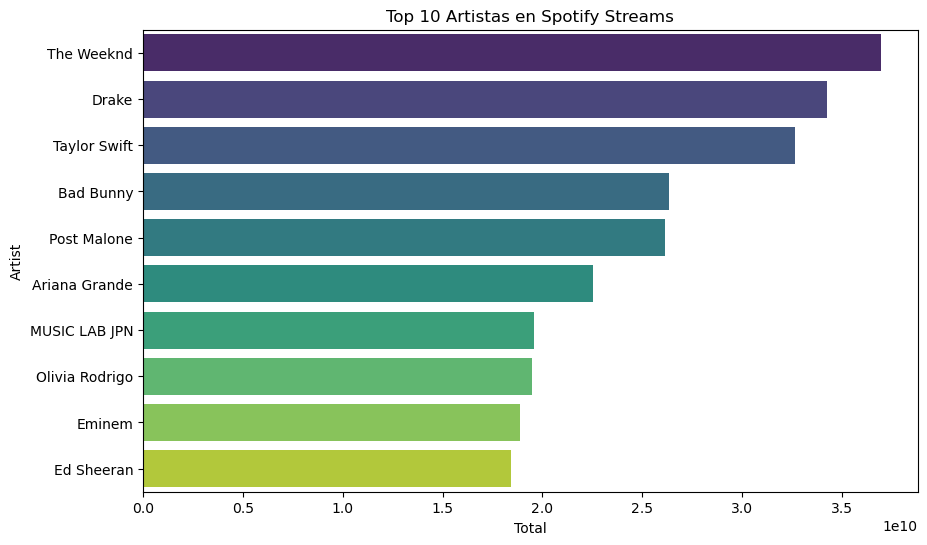

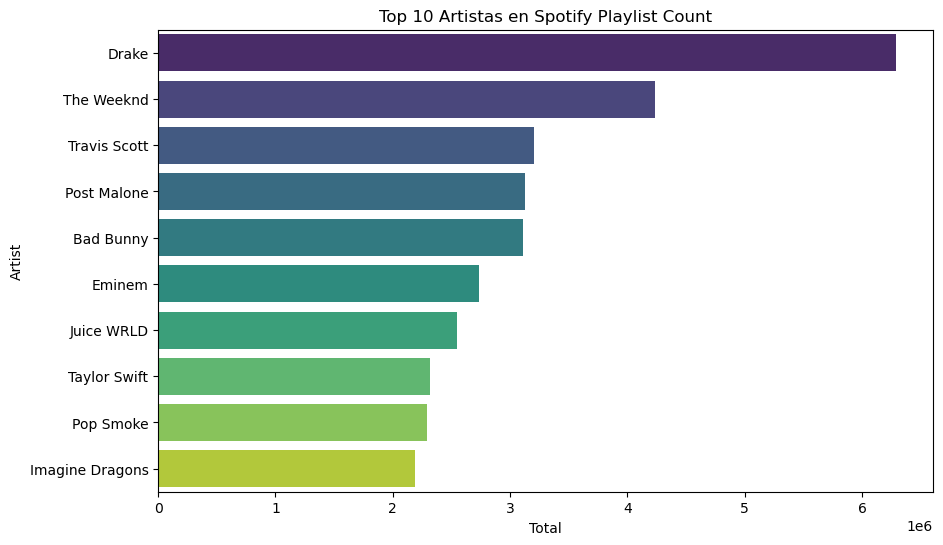

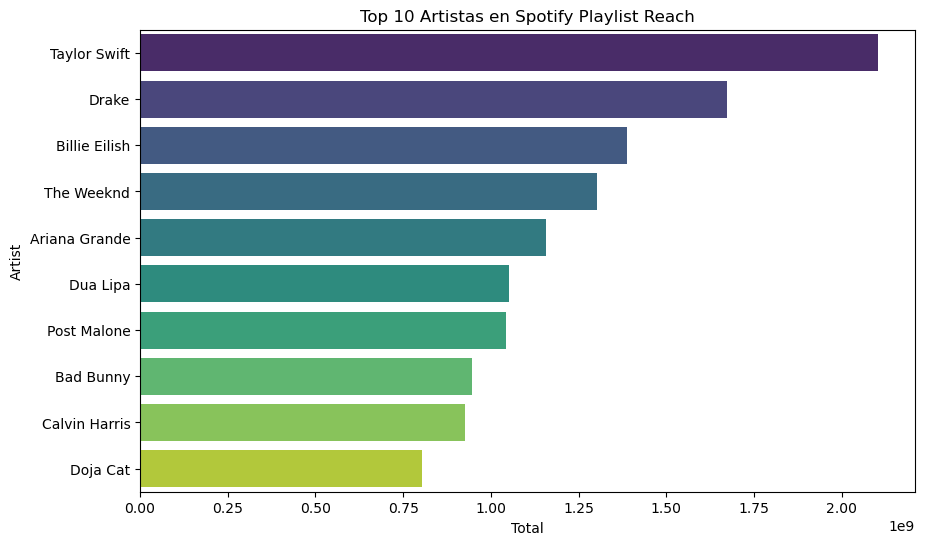

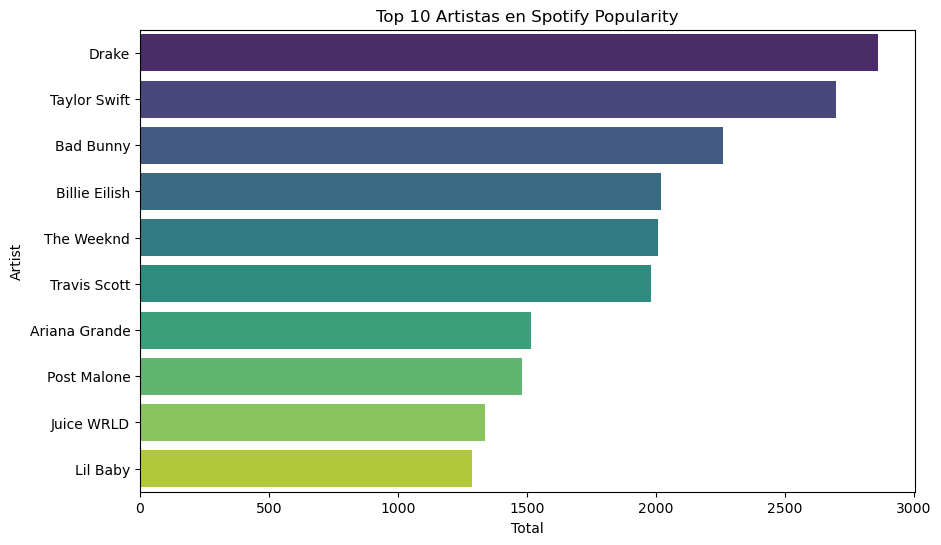

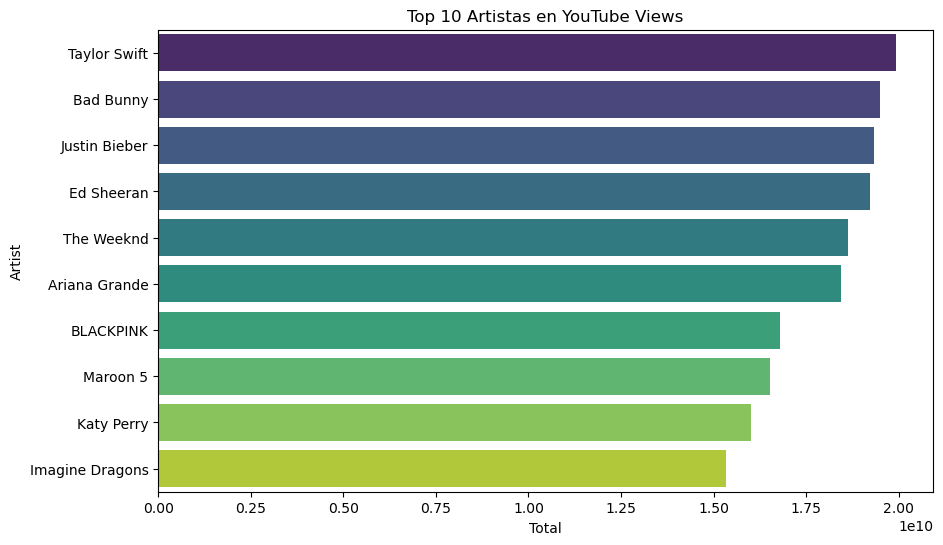

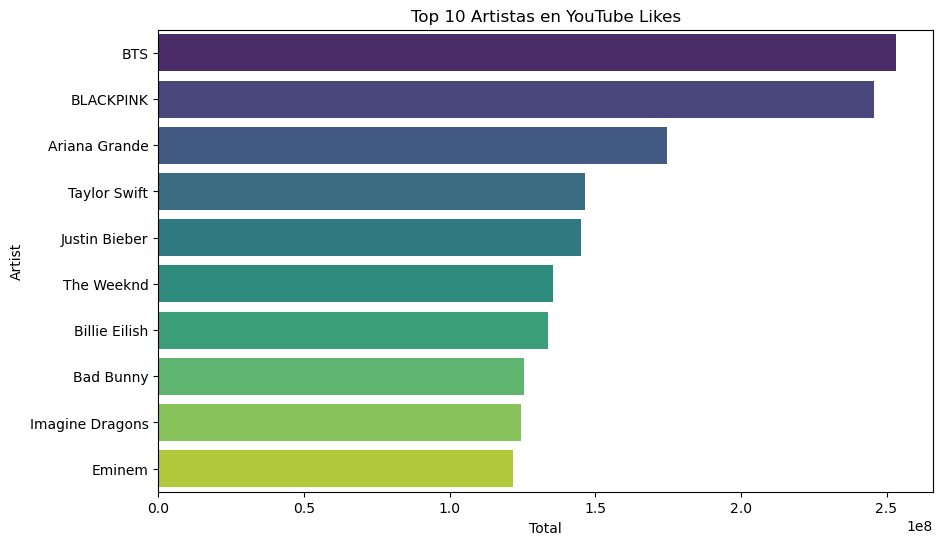

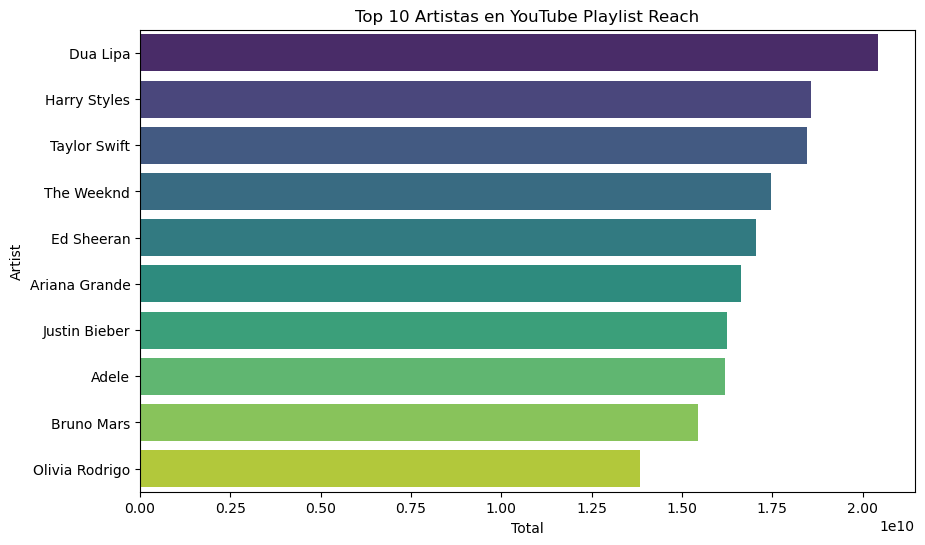

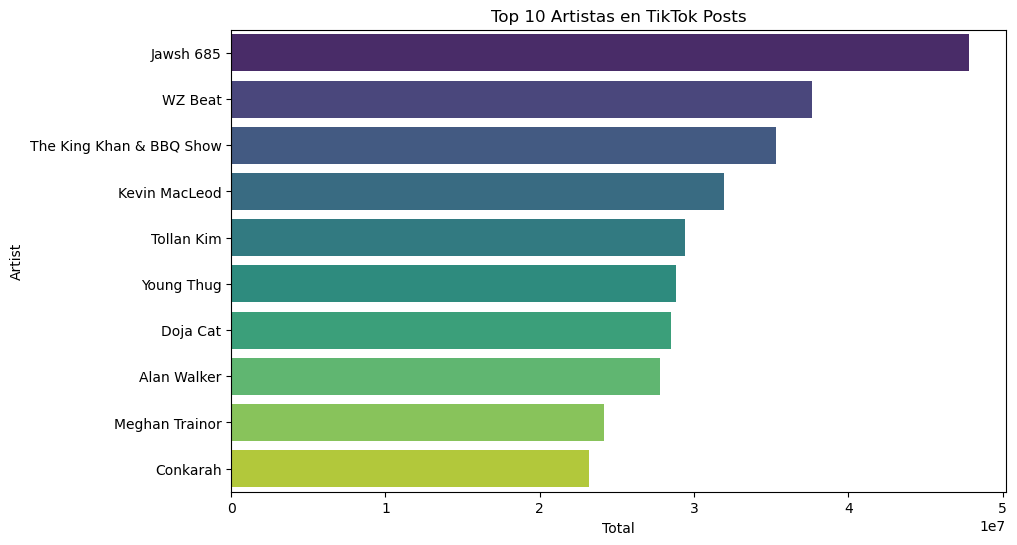

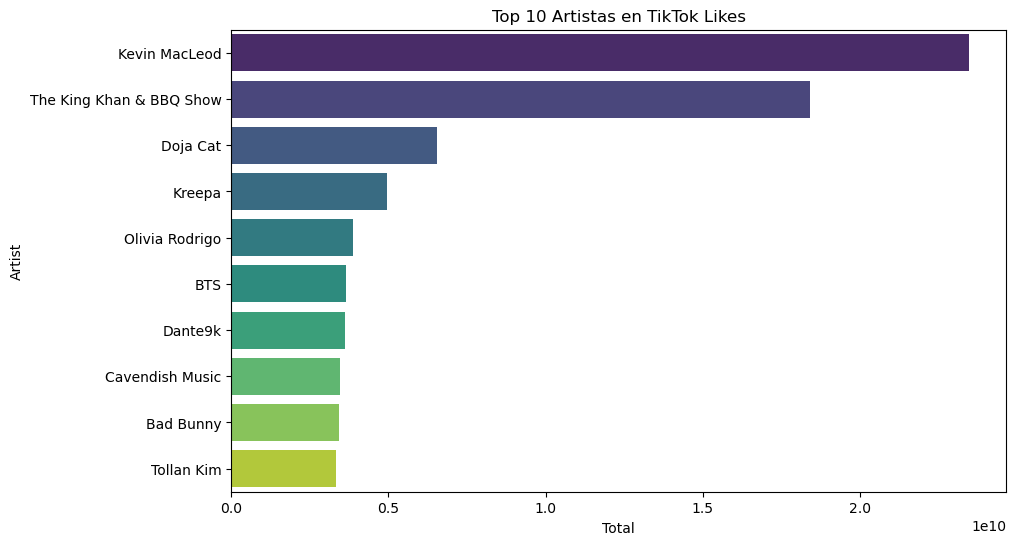

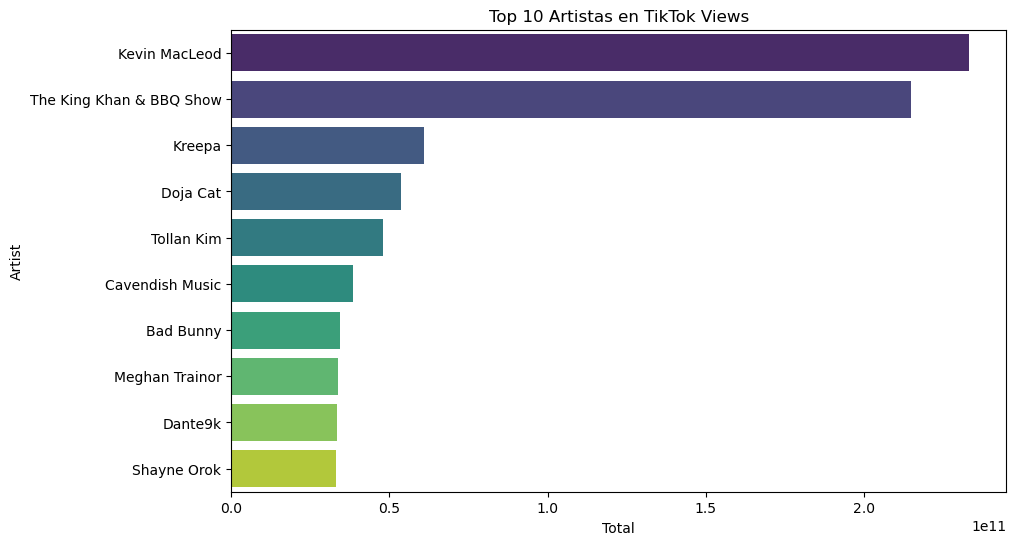

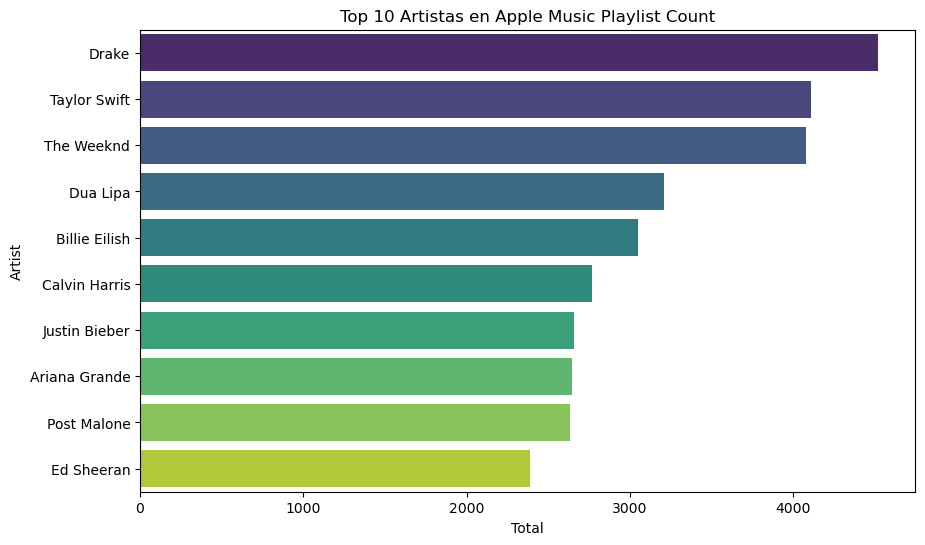

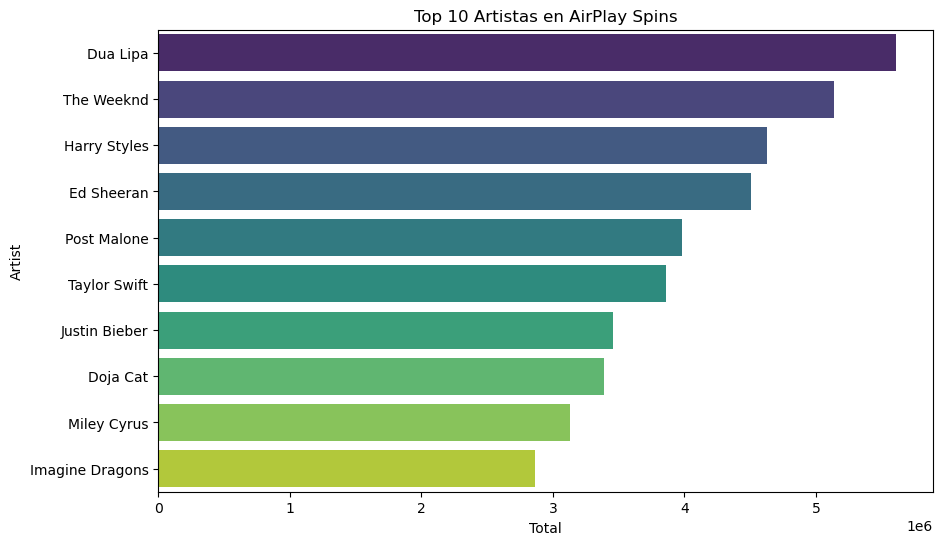

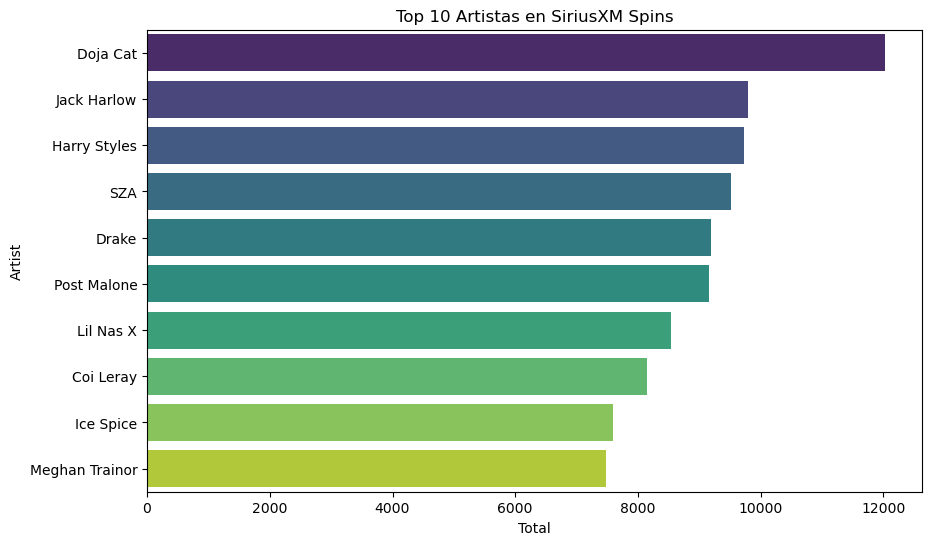

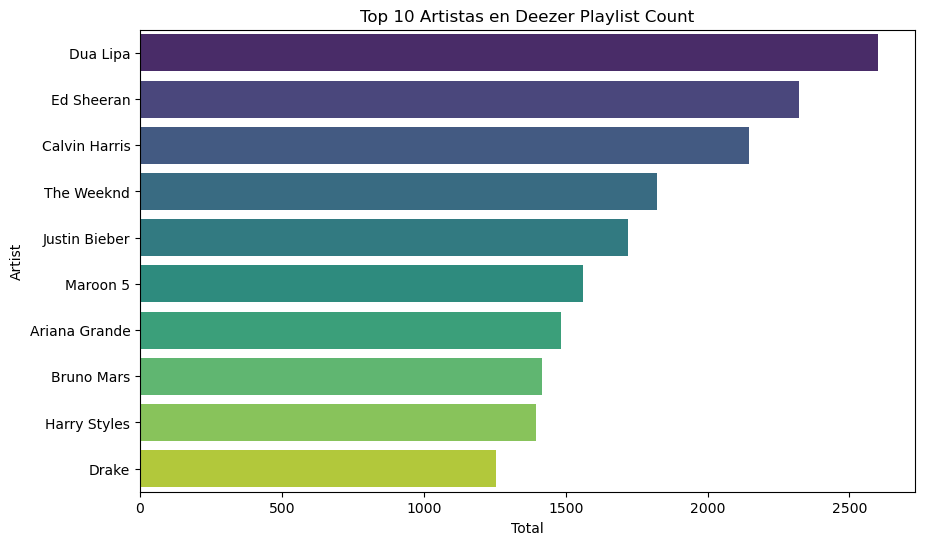

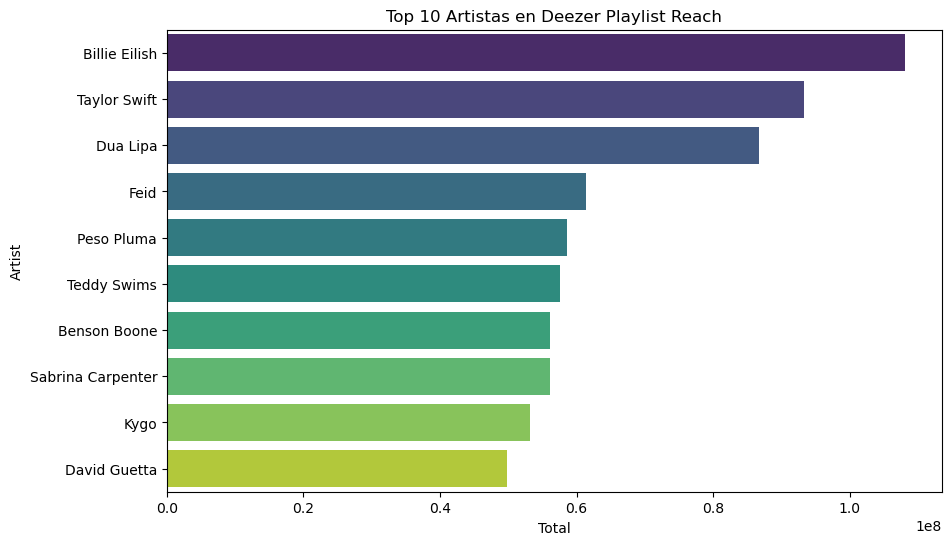

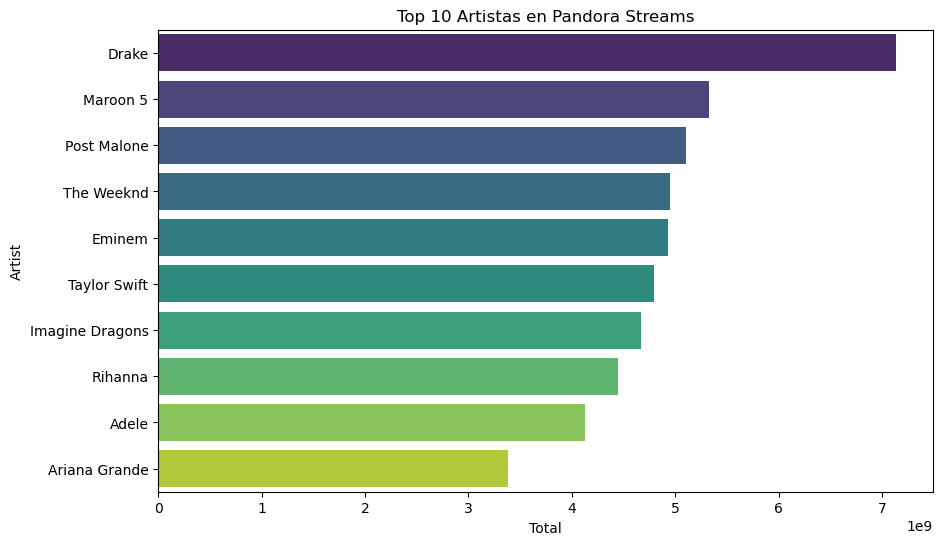

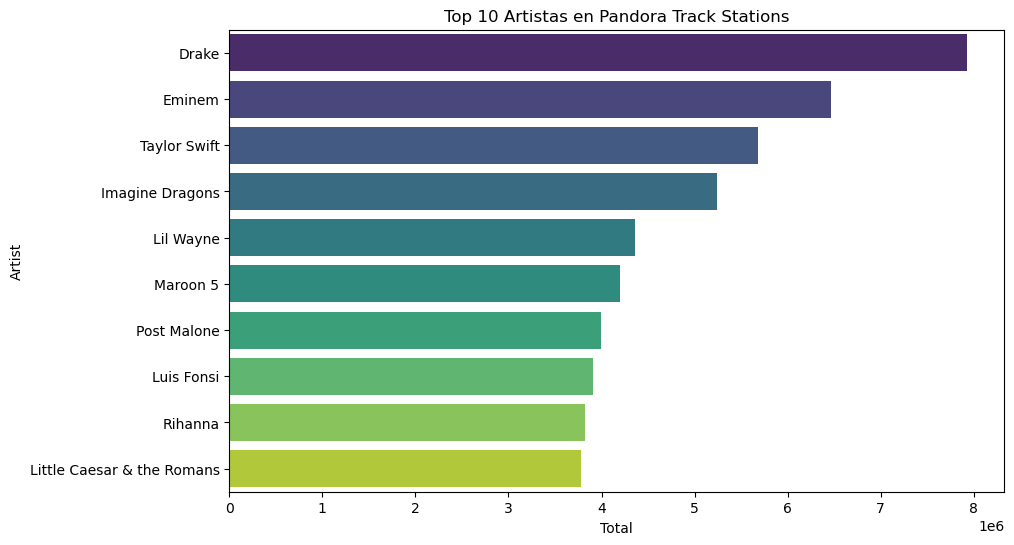

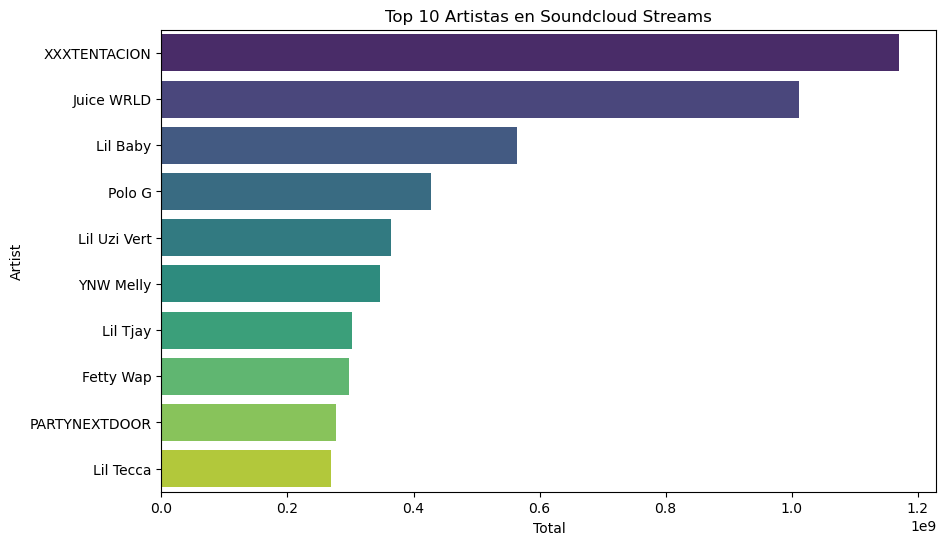

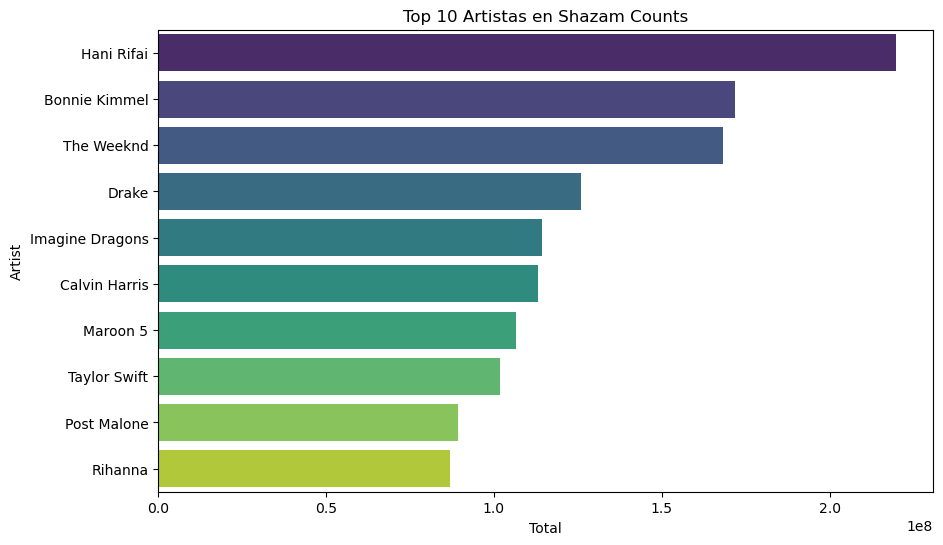

In [20]:
for metric in metrics:
    create_bar_plot(artist_summary, metric, f'Top 10 Artistas en {metric}')

##### METRICAS DE VISUALIZACION

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los 10 mejores artistas según el "All Time Rank"
top_artists = df.groupby('Artist')['All Time Rank'].min().nsmallest(10).index

# Filtrar el DataFrame original para solo incluir estos artistas
filtered_df = df[df['Artist'].isin(top_artists)]


In [22]:

# Agrupar y resumir las métricas por artista y canción
track_summary = filtered_df.groupby(['Artist', 'Track']).sum().reset_index()

# Seleccionar las métricas relevantes para cada plataforma
visualization_metrics = [
    'Spotify Streams', 'YouTube Views', 'TikTok Views',
    'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams'
]

# Crear una nueva columna con la suma de todas las visualizaciones/plataformas
track_summary['Total Views'] = track_summary[visualization_metrics].sum(axis=1)



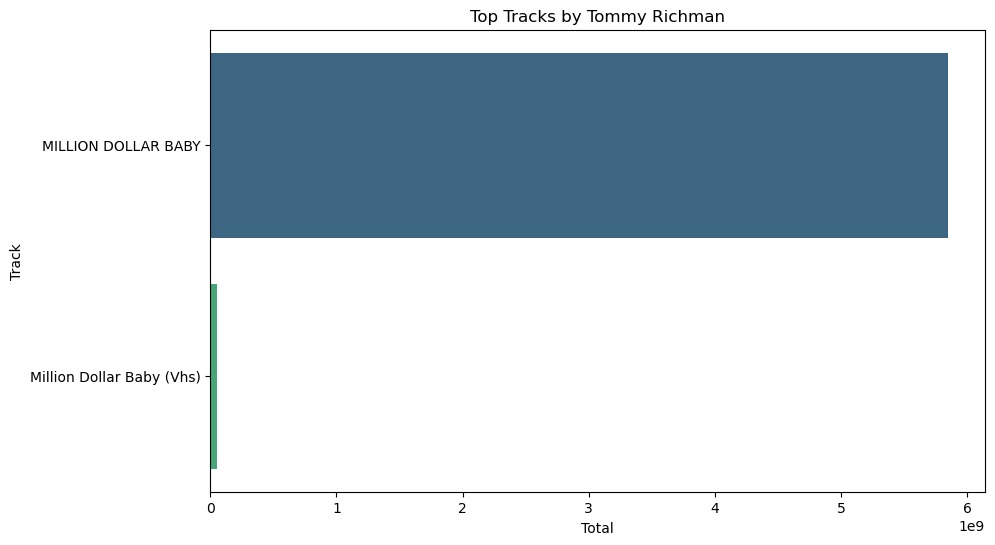

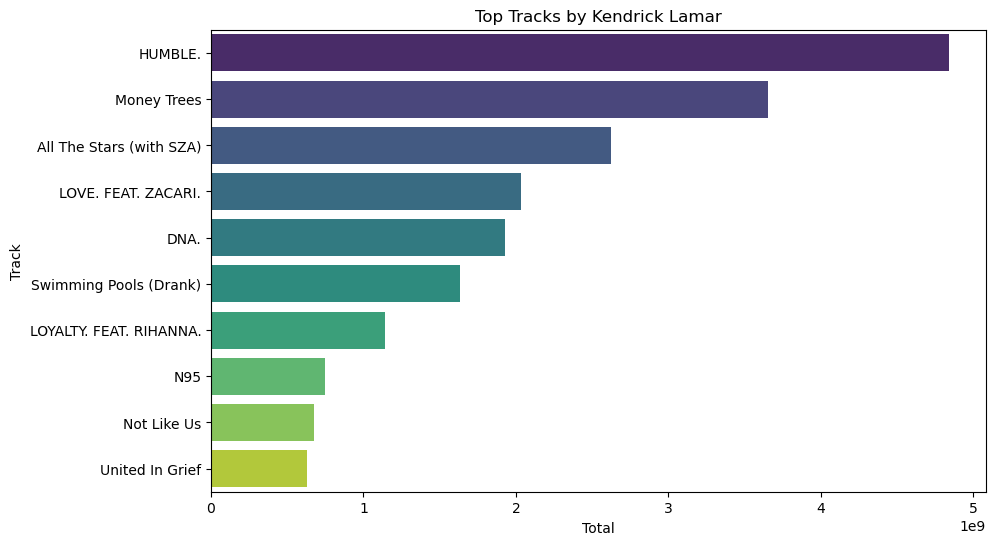

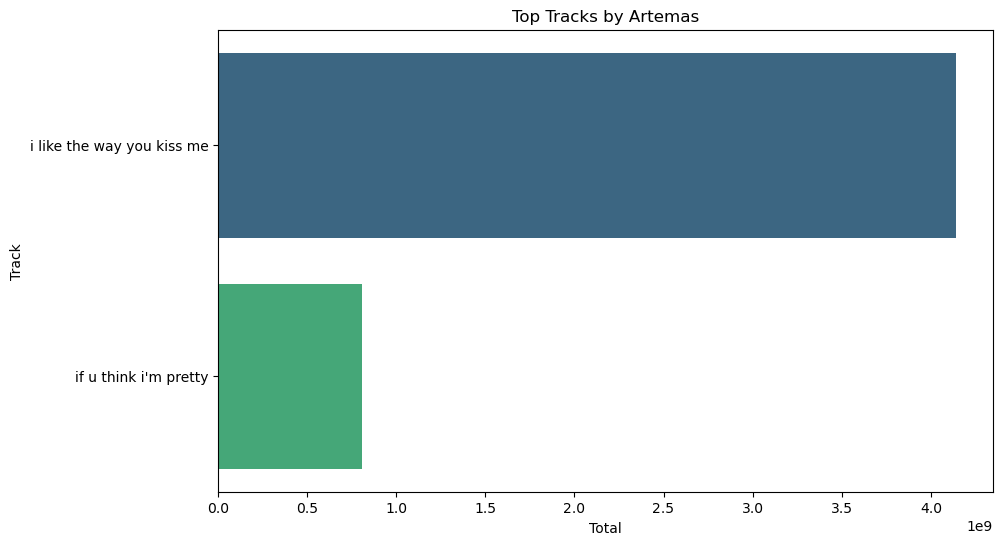

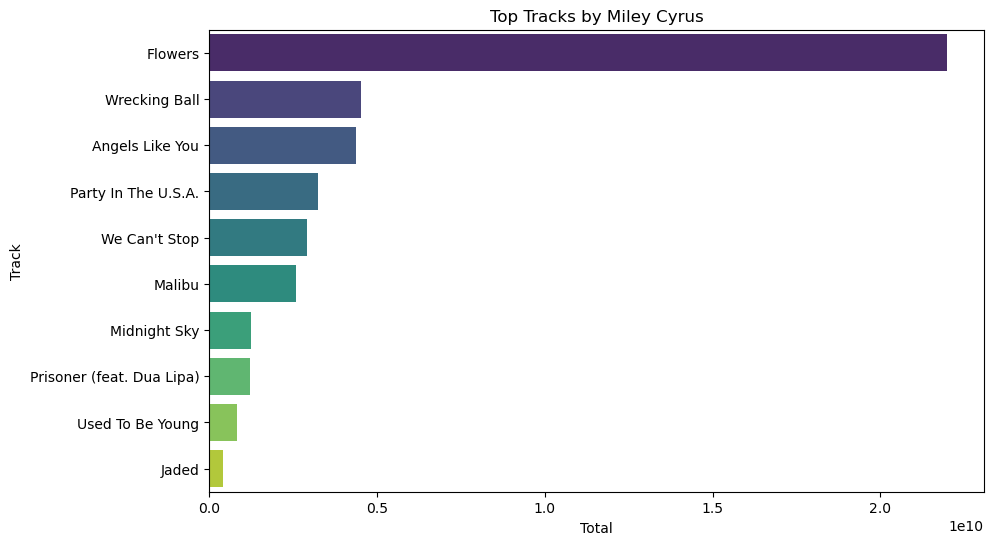

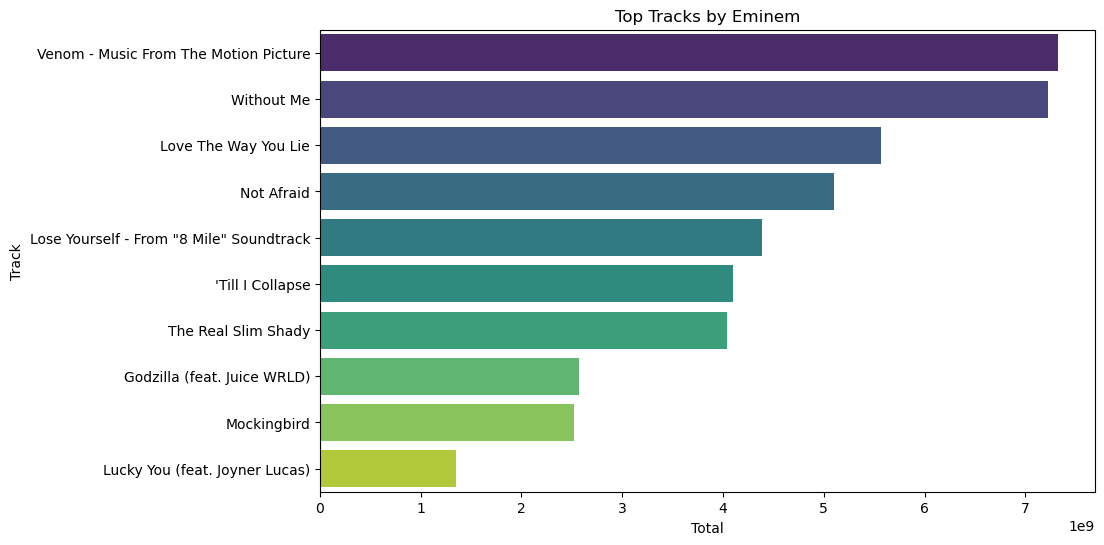

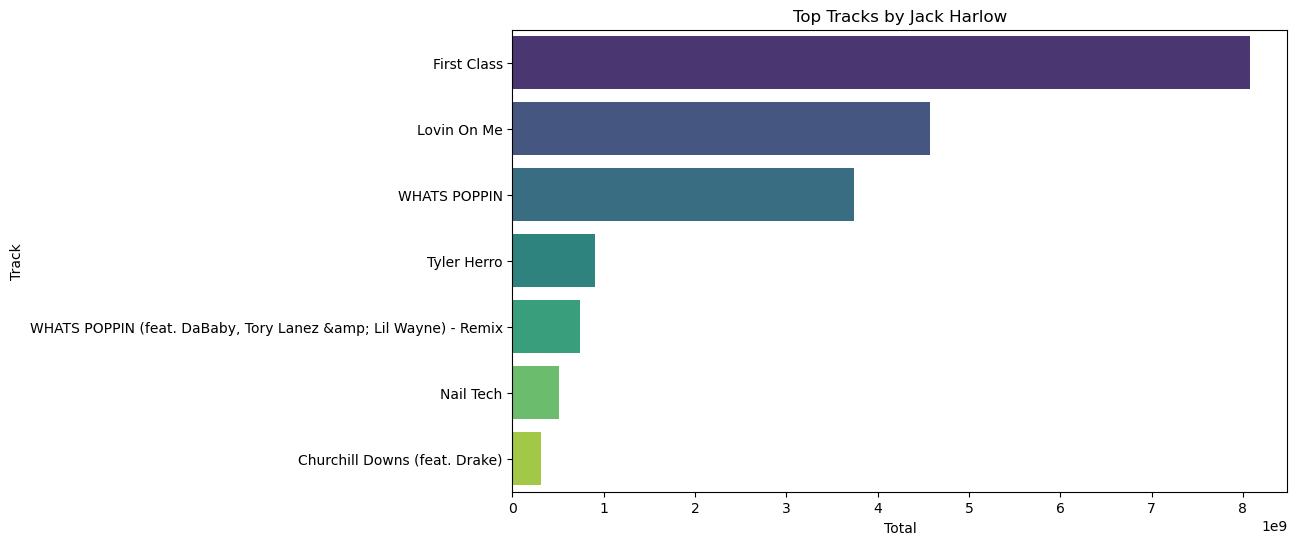

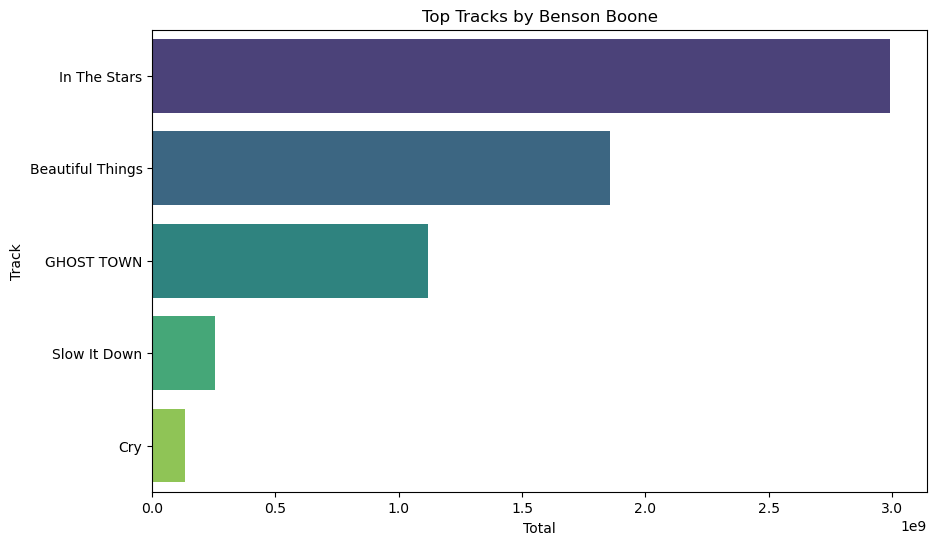

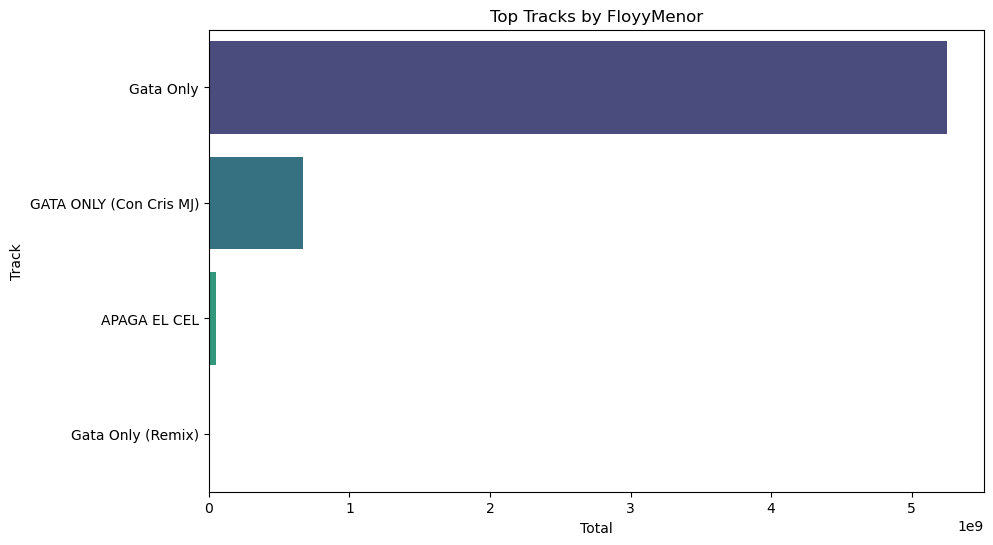

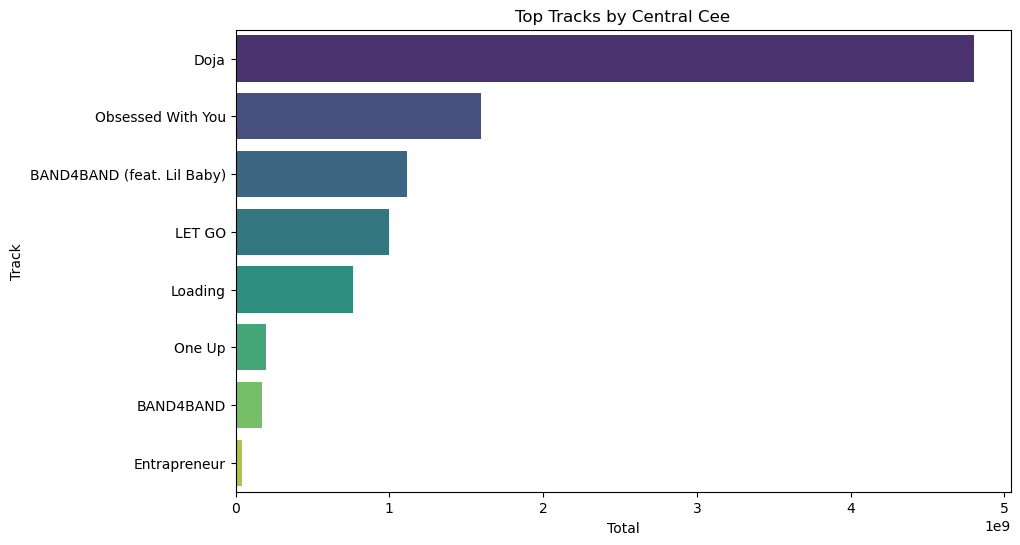

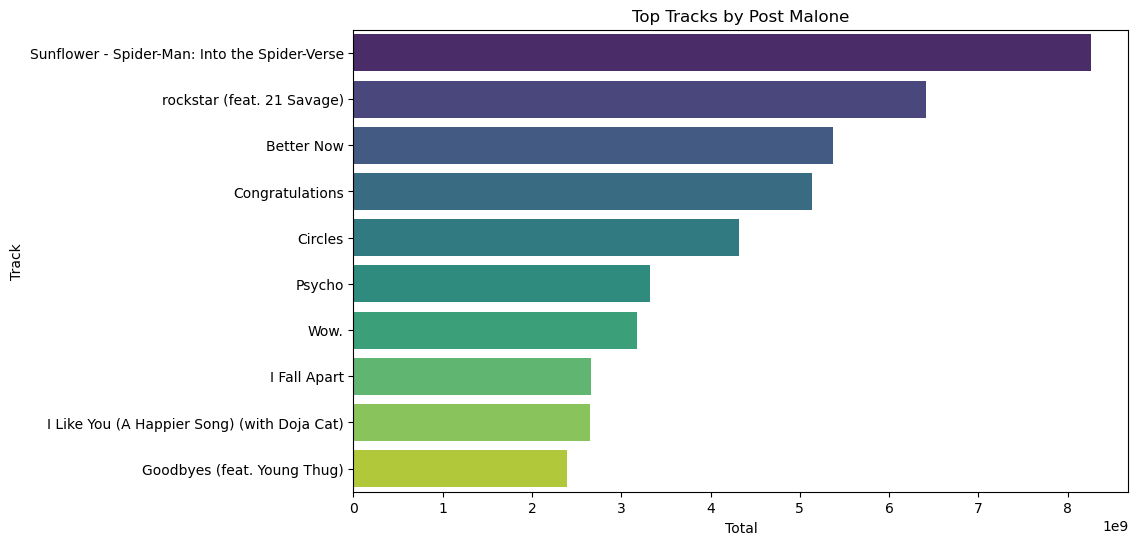

In [23]:
# Función para crear un gráfico de barras
def create_bar_plot(data, metric, title, y_label='Track'):
    plt.figure(figsize=(10, 6))
    data_sorted = data.sort_values(by=metric, ascending=False).head(10)
    sns.barplot(x=metric, y=y_label, data=data_sorted, palette='viridis')
    plt.title(title)
    plt.xlabel('Total')
    plt.ylabel(y_label)
    plt.show()

# Crear gráficos para las mejores canciones de cada uno de los 10 mejores artistas
for artist in top_artists:
    artist_data = track_summary[track_summary['Artist'] == artist]
    create_bar_plot(artist_data, 'Total Views', f'Top Tracks by {artist}', 'Track')

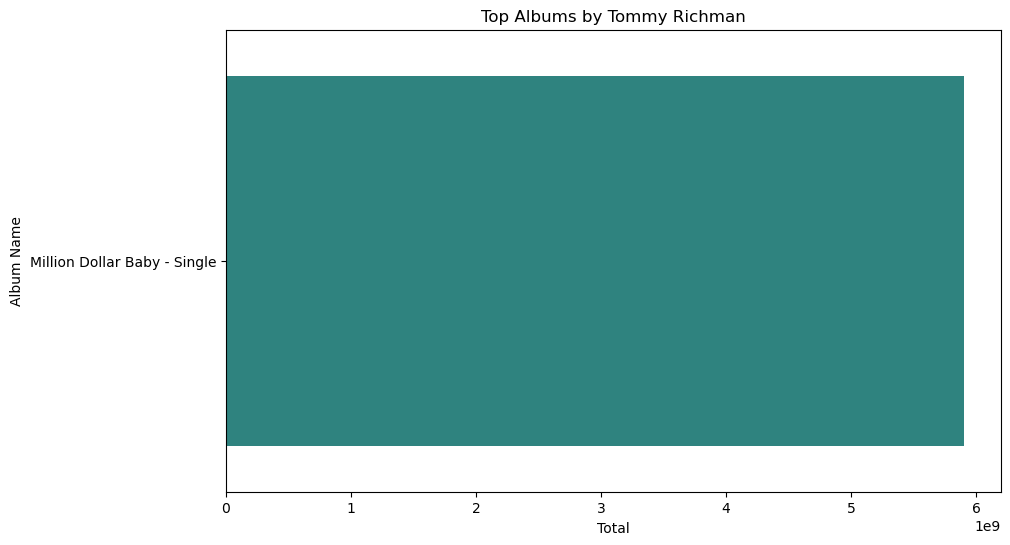

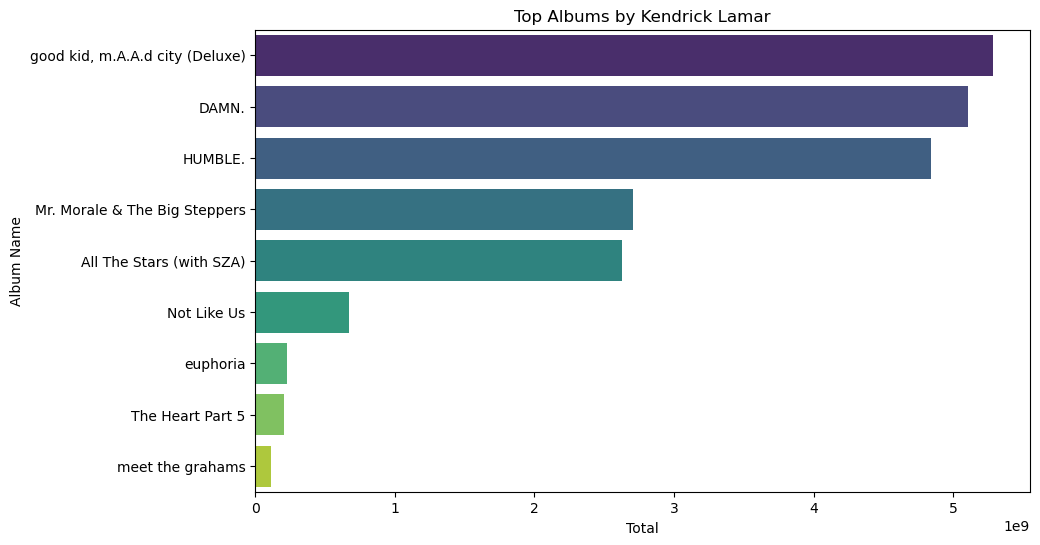

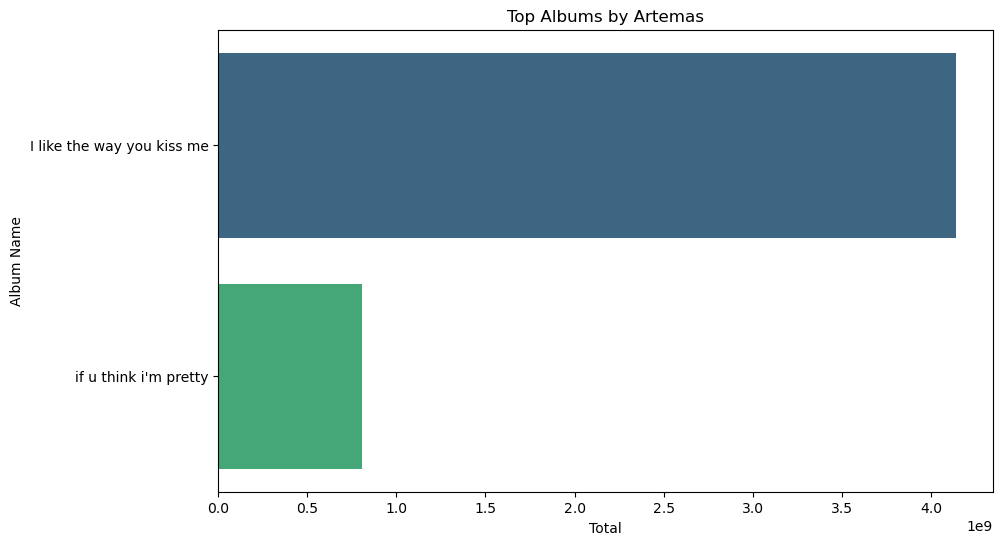

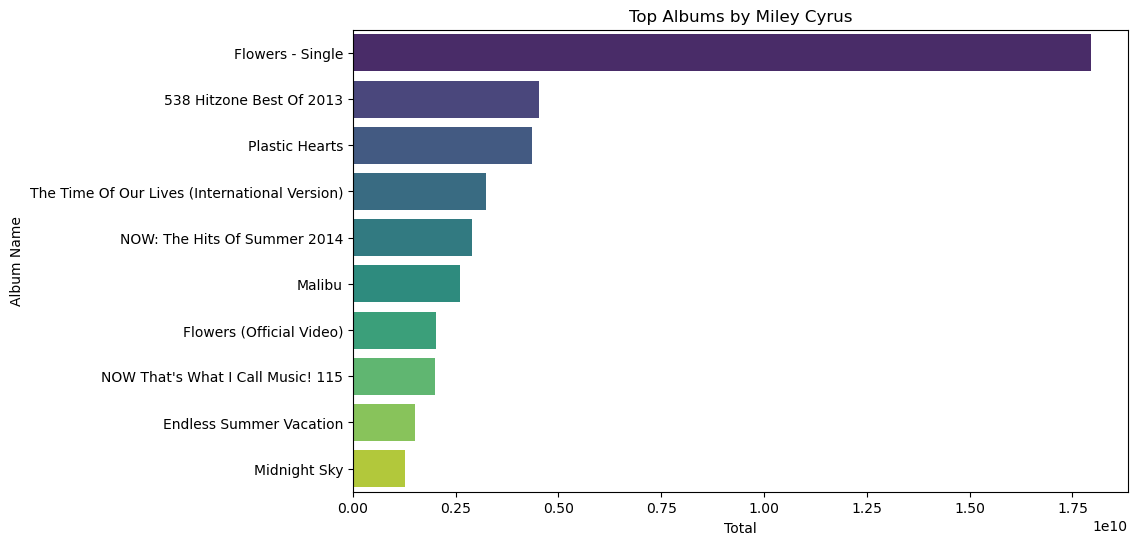

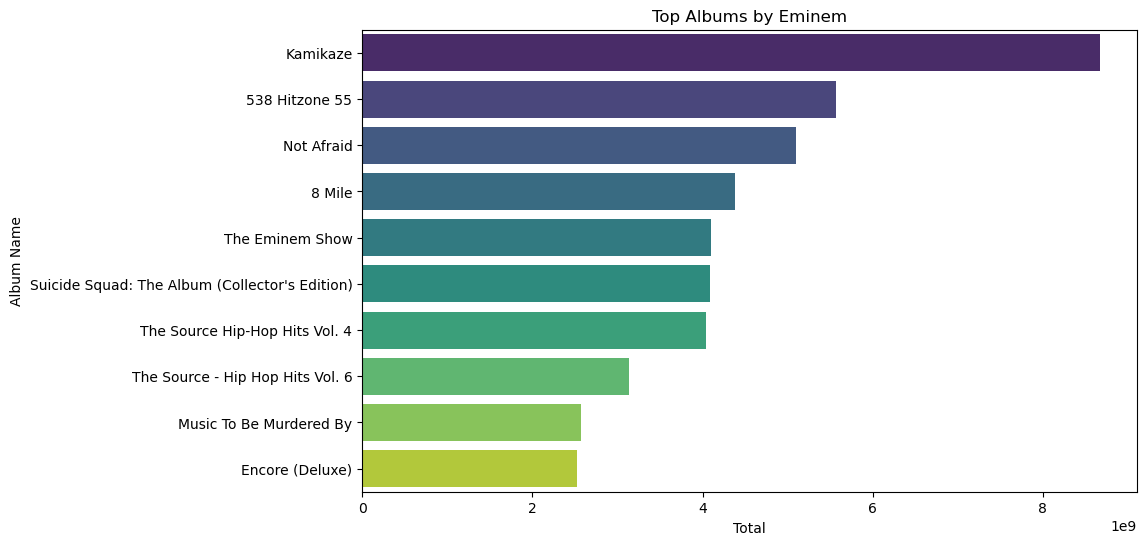

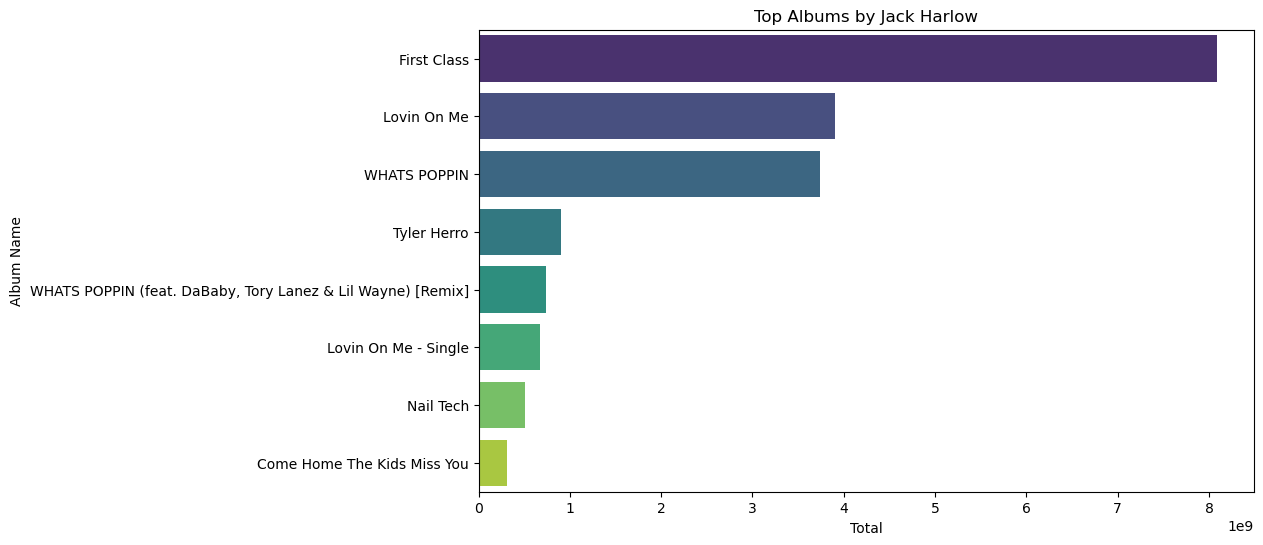

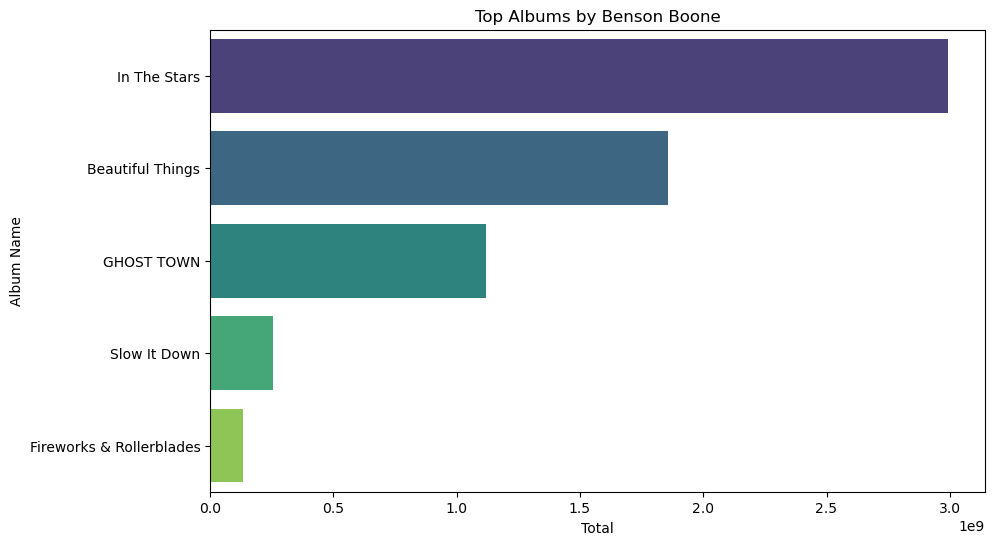

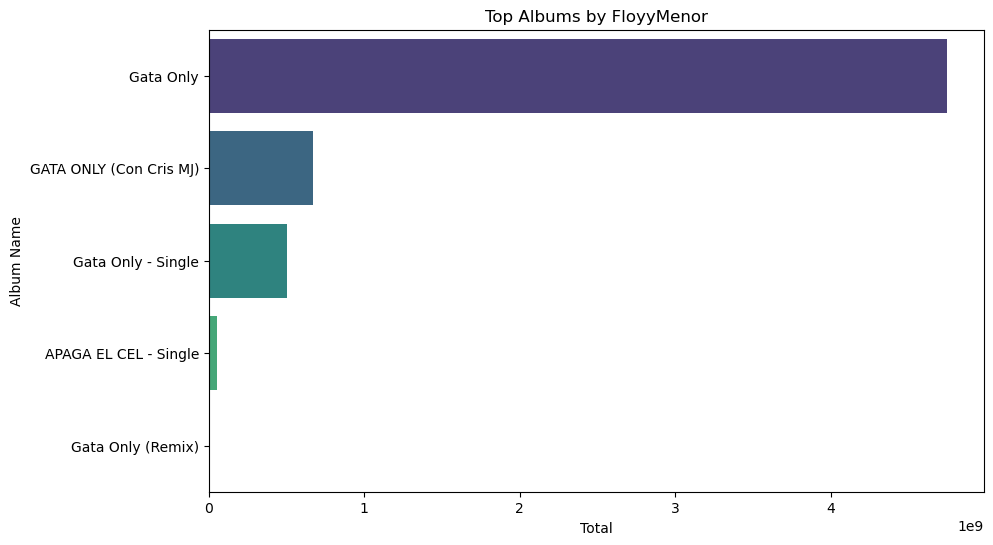

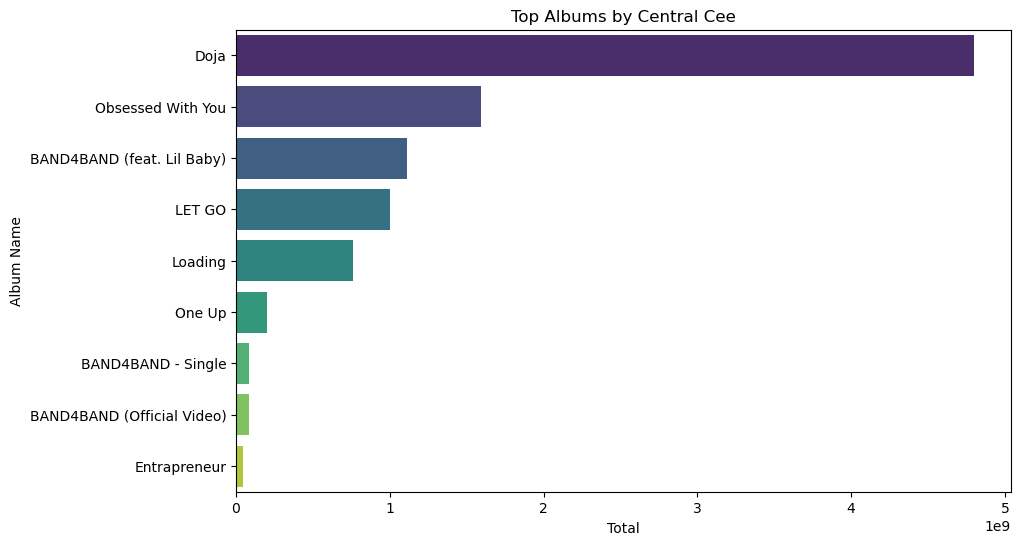

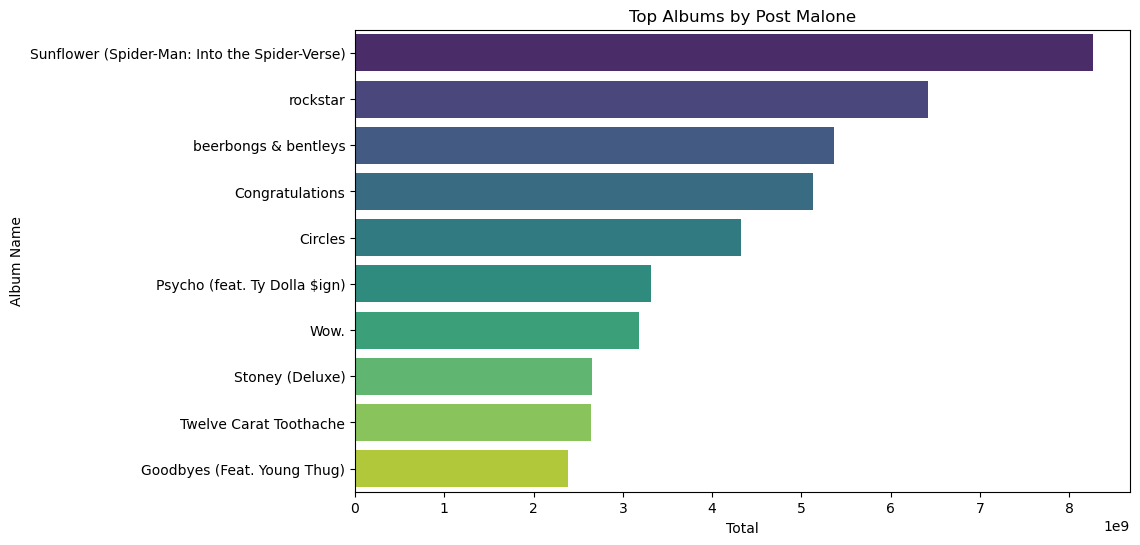

In [24]:
# Agrupar y resumir las métricas por artista y álbum
album_summary = filtered_df.groupby(['Artist', 'Album Name']).sum().reset_index()

# Crear una nueva columna con la suma de todas las visualizaciones/plataformas
album_summary['Total Views'] = album_summary[visualization_metrics].sum(axis=1)

# Crear gráficos para los mejores álbumes de cada uno de los 10 mejores artistas
for artist in top_artists:
    artist_data = album_summary[album_summary['Artist'] == artist]
    create_bar_plot(artist_data, 'Total Views', f'Top Albums by {artist}', 'Album Name')

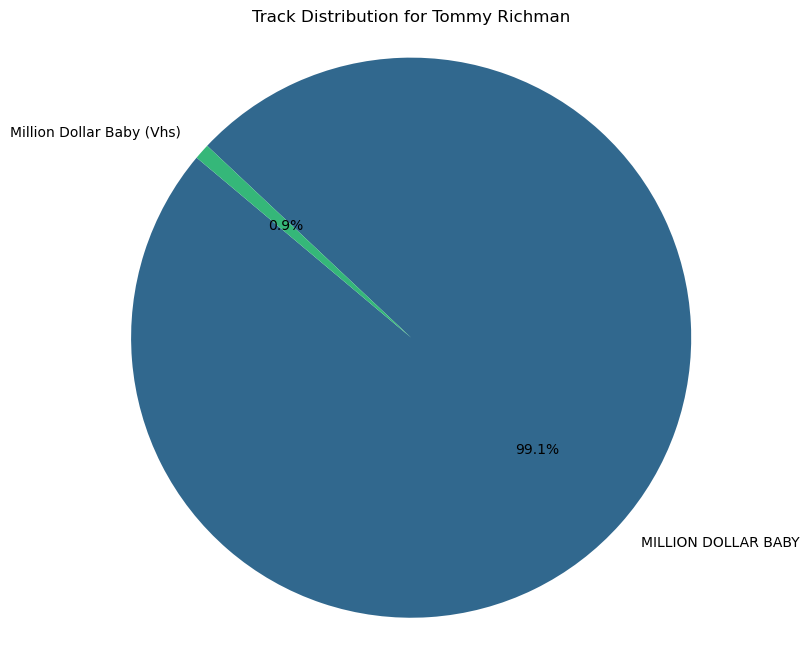

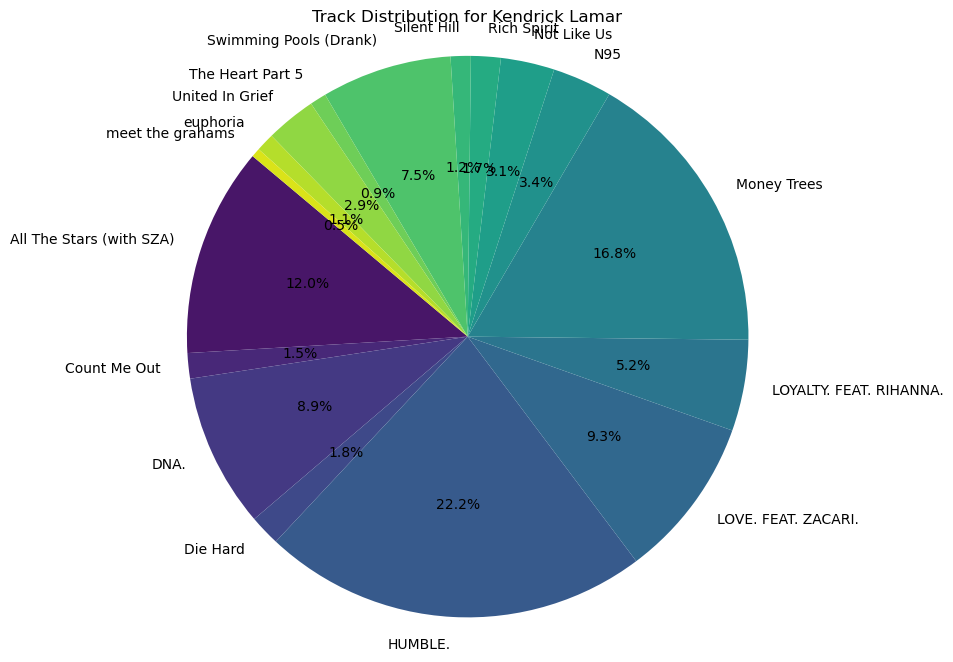

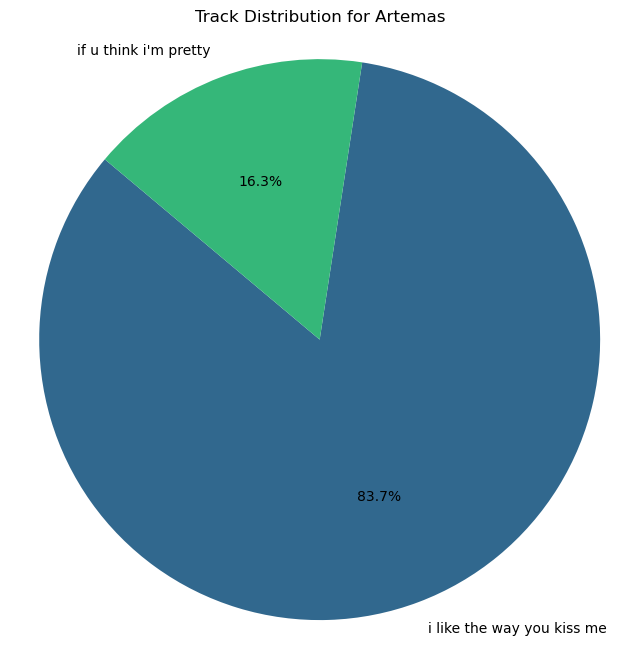

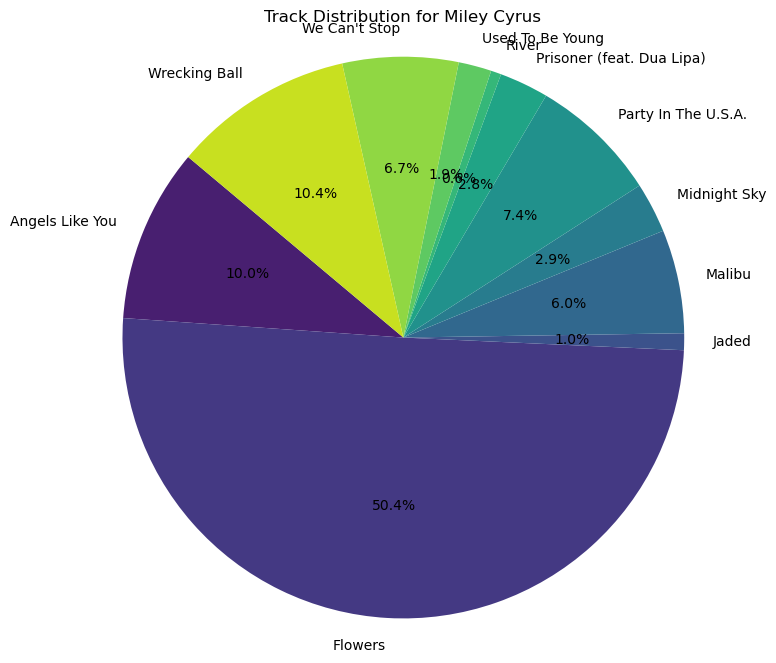

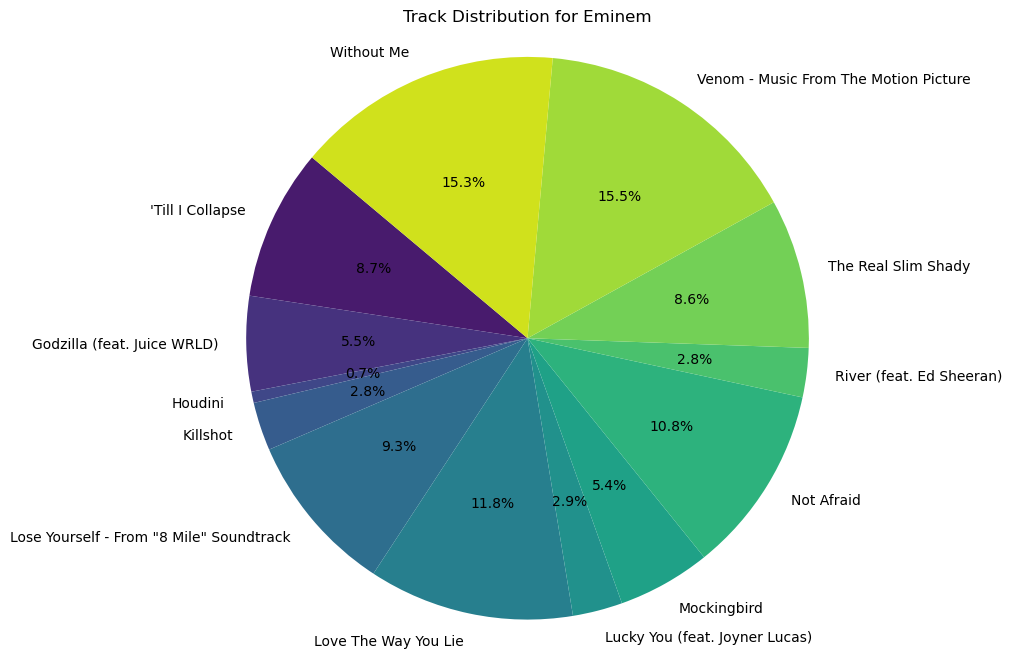

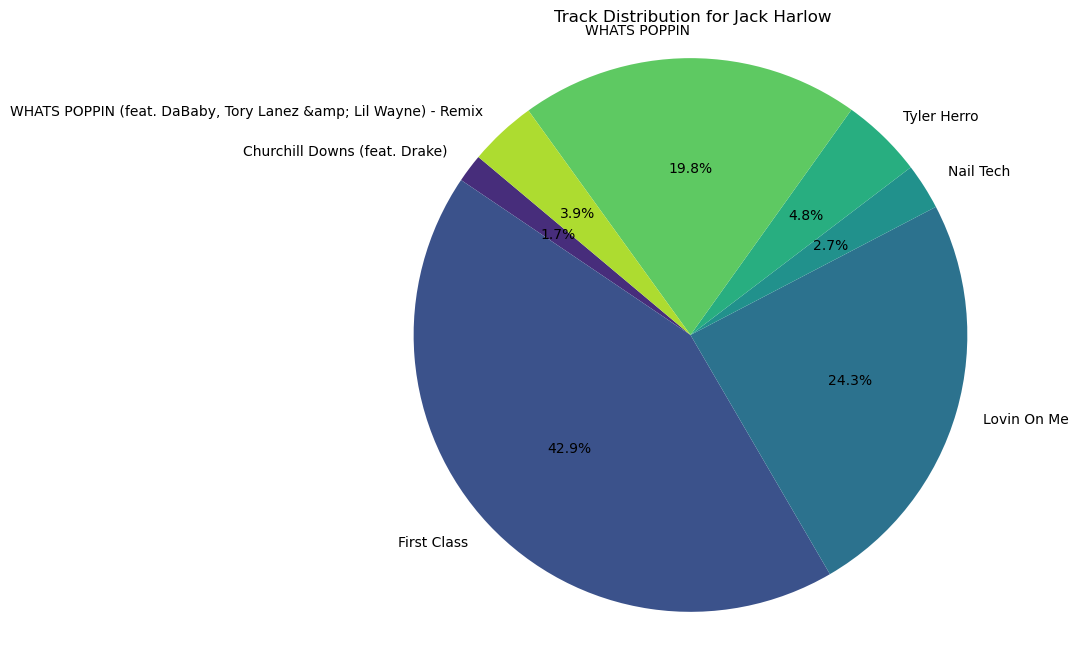

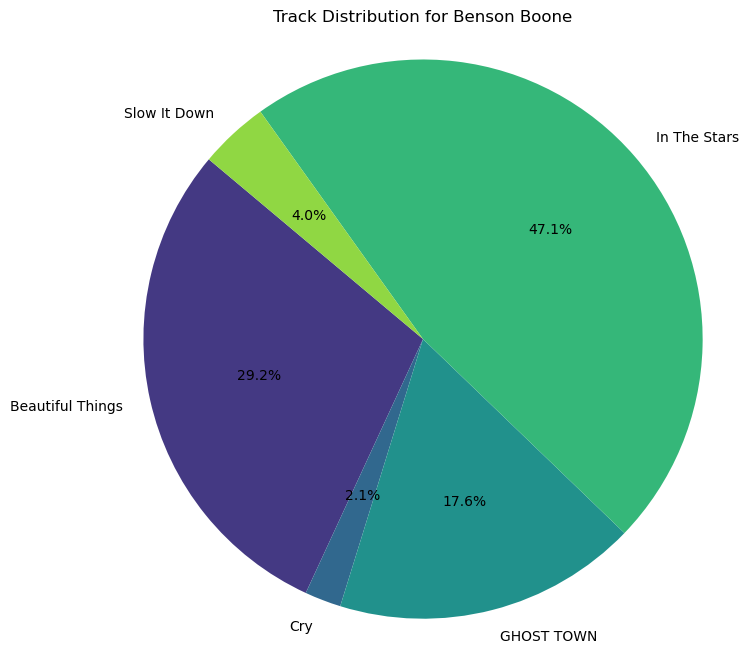

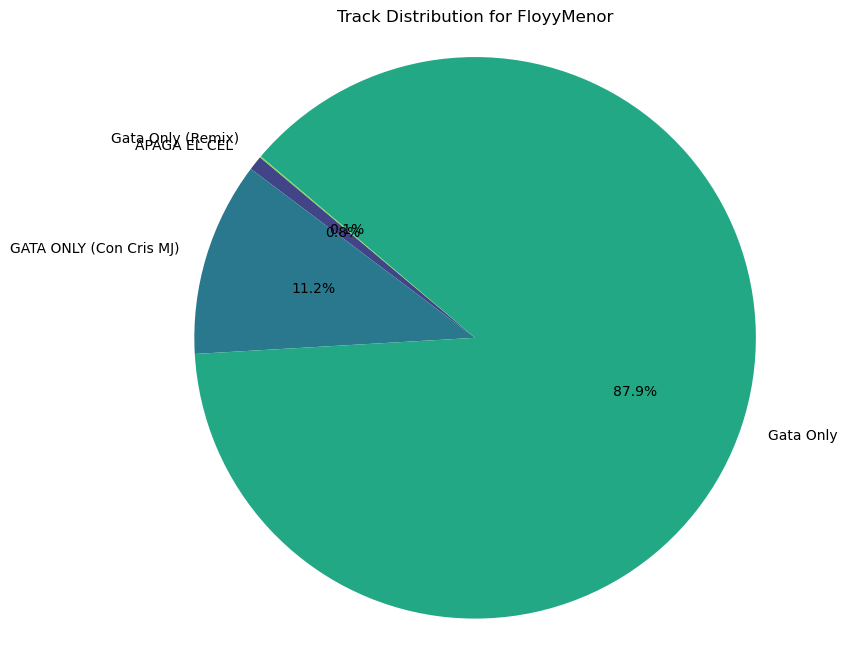

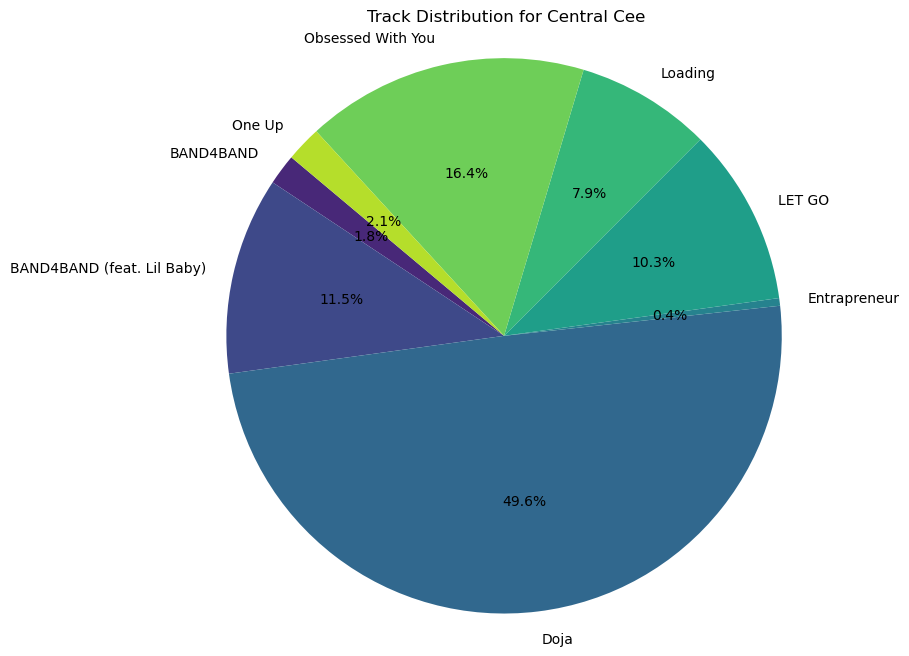

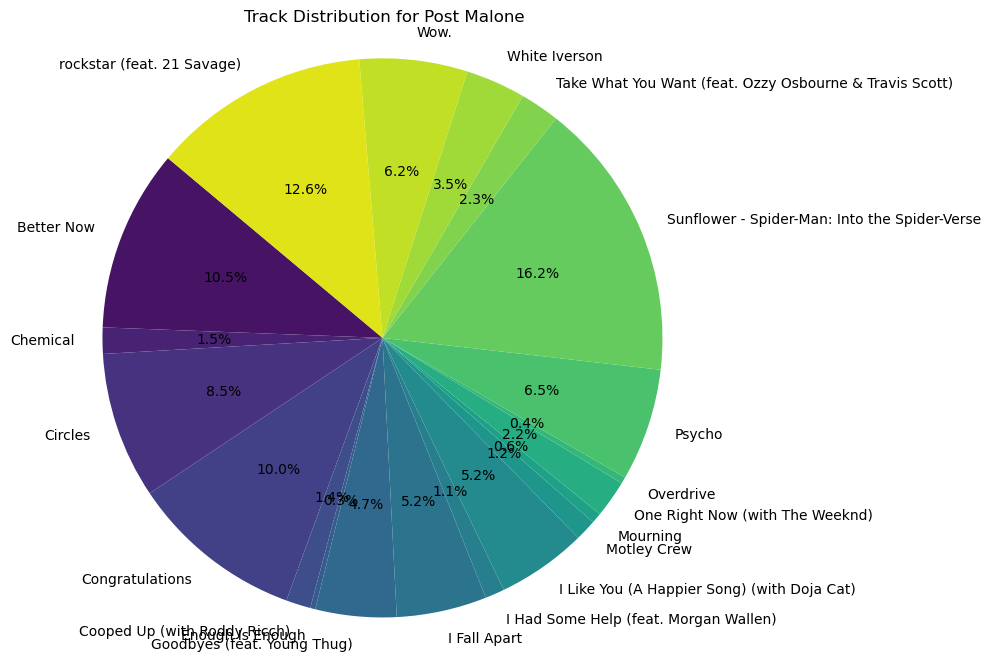

In [25]:
# Función para crear un gráfico de pastel
def create_pie_chart(data, labels, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(labels)))
    plt.title(title)
    plt.axis('equal')  # Para asegurar que el gráfico es un círculo.
    plt.show()

# Crear gráficos de pastel para las mejores canciones de cada uno de los 10 mejores artistas
for artist in top_artists:
    artist_data = track_summary[track_summary['Artist'] == artist]
    create_pie_chart(artist_data['Total Views'], artist_data['Track'], f'Track Distribution for {artist}')



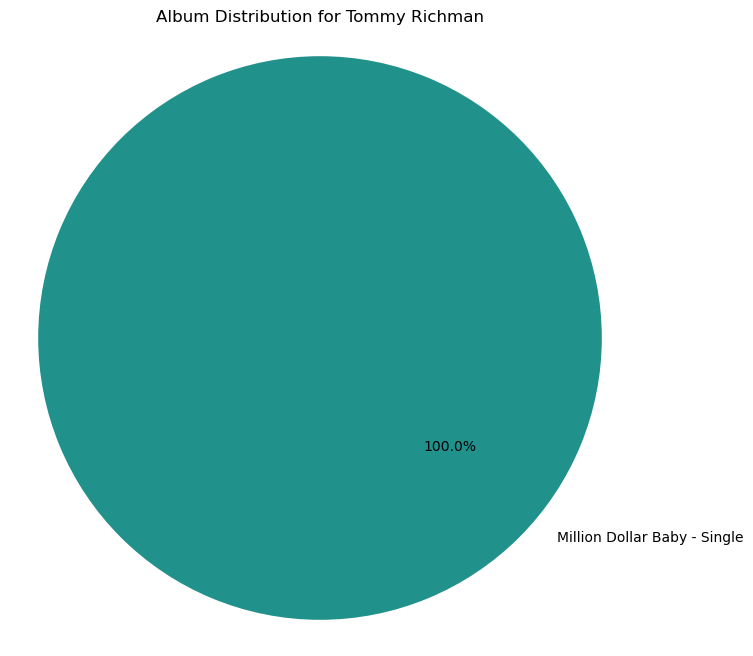

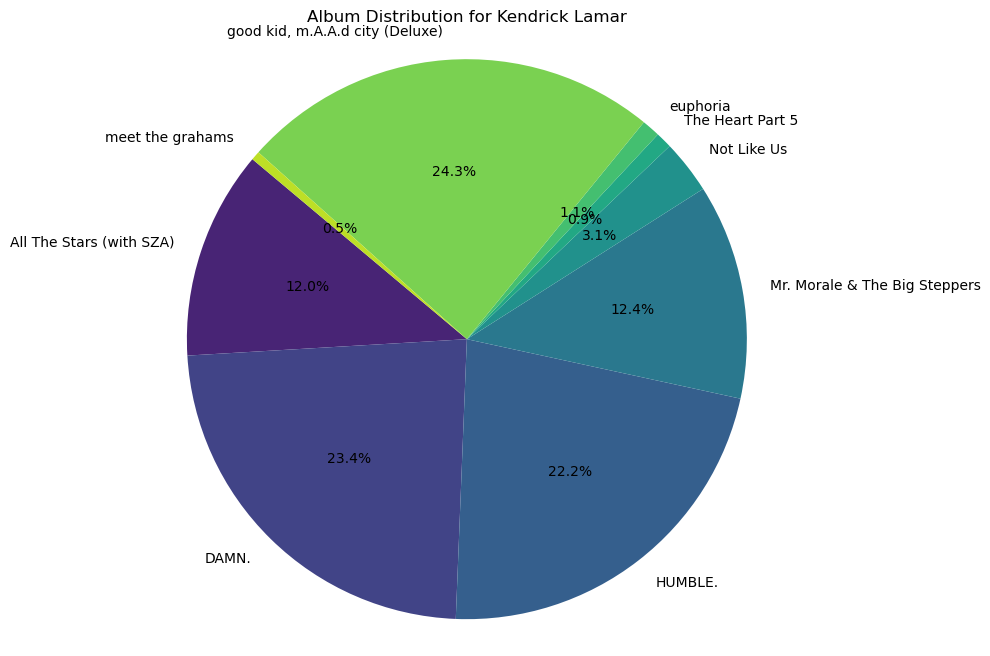

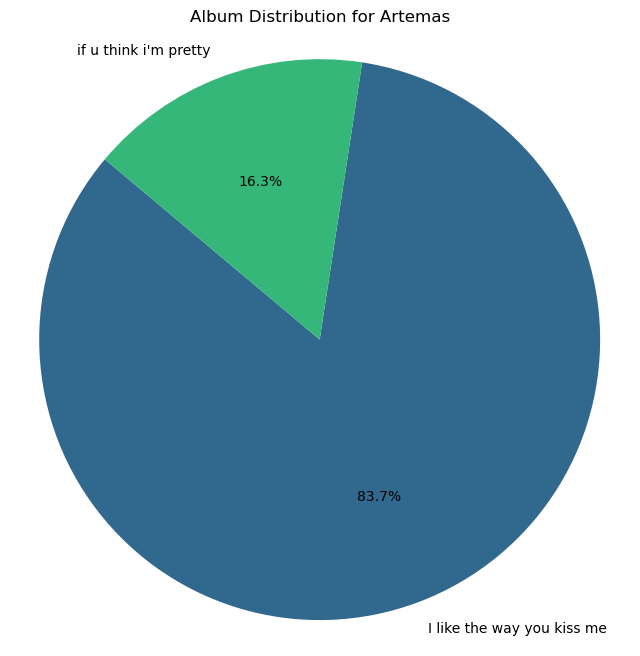

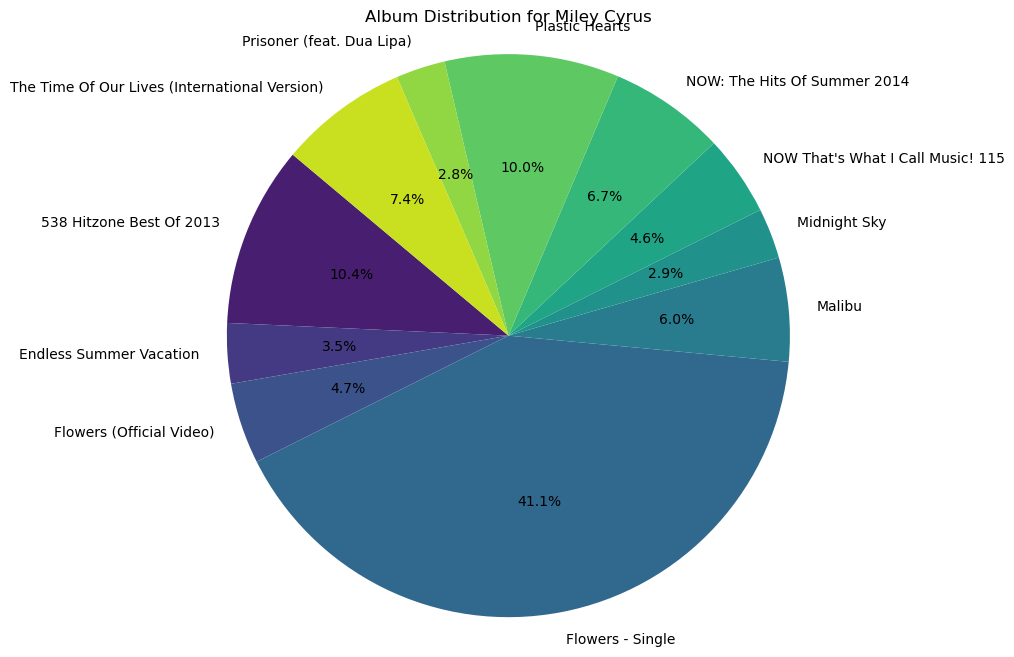

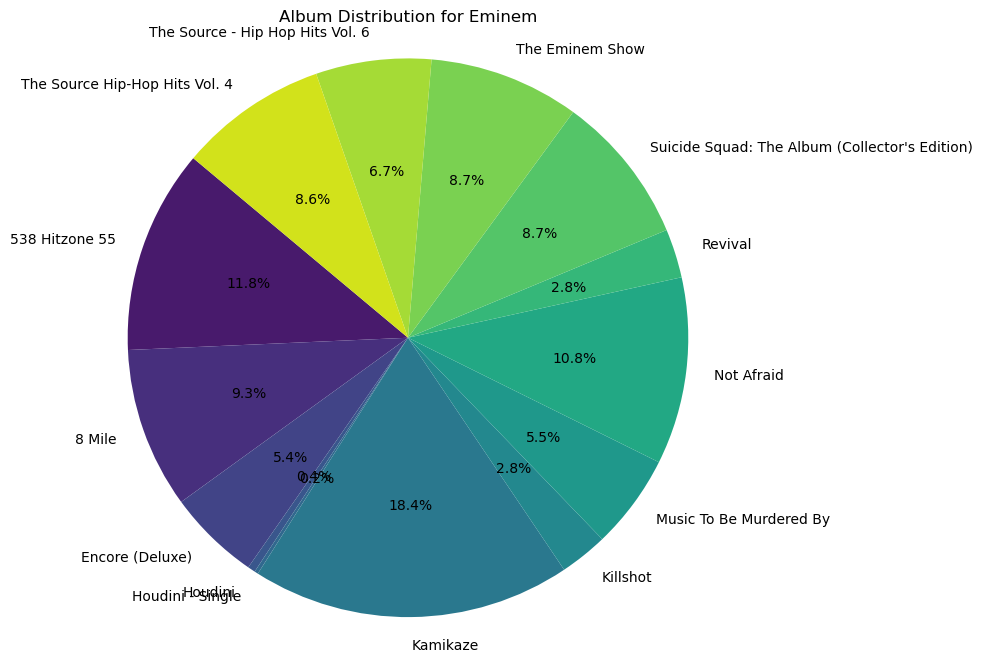

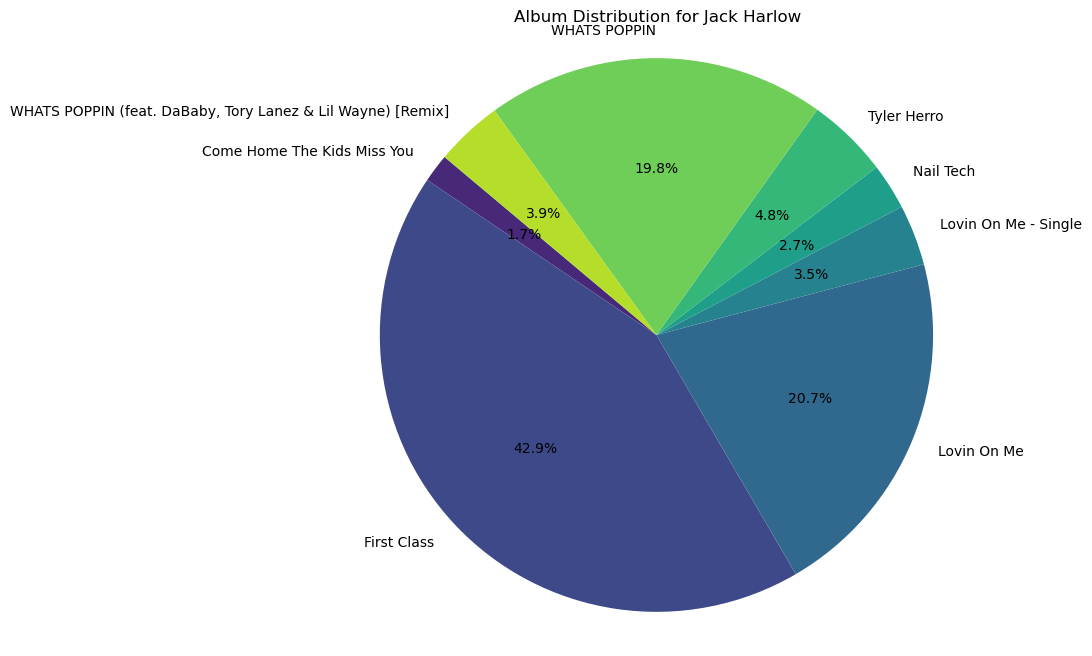

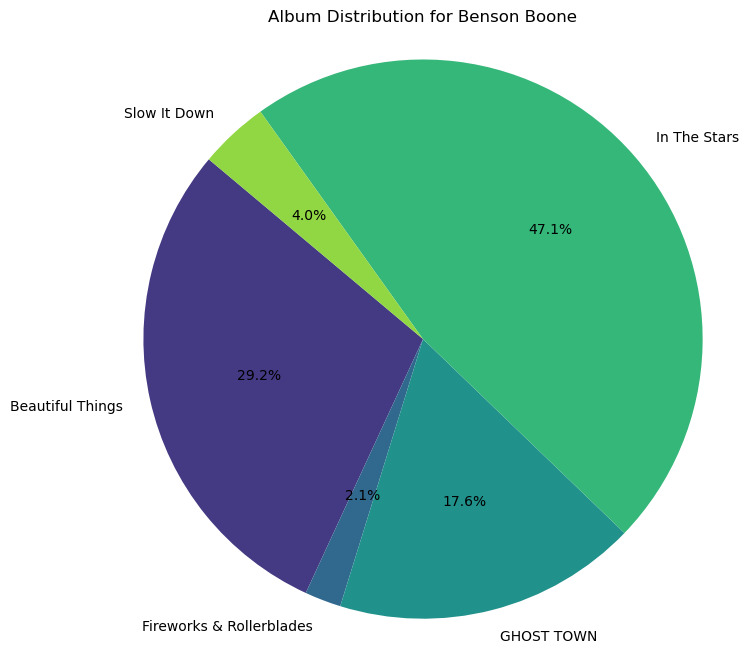

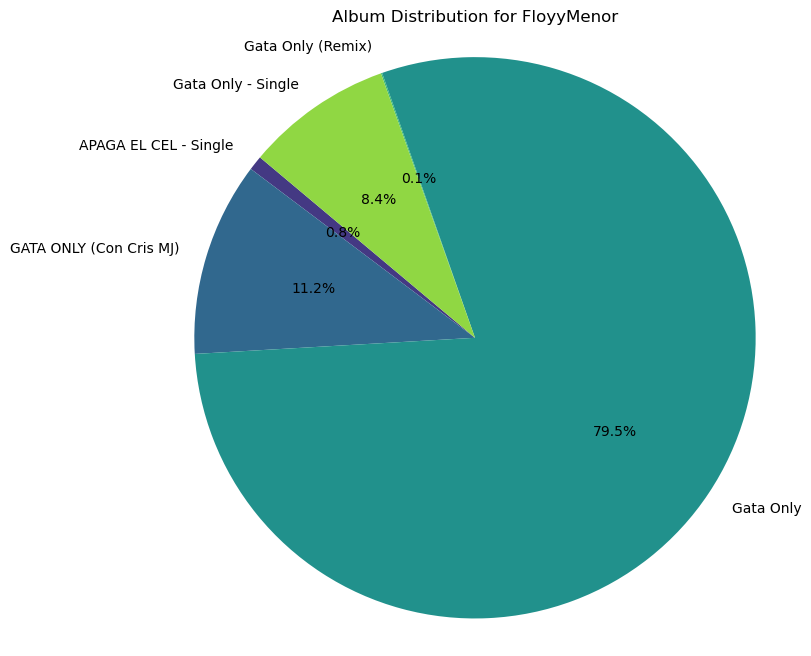

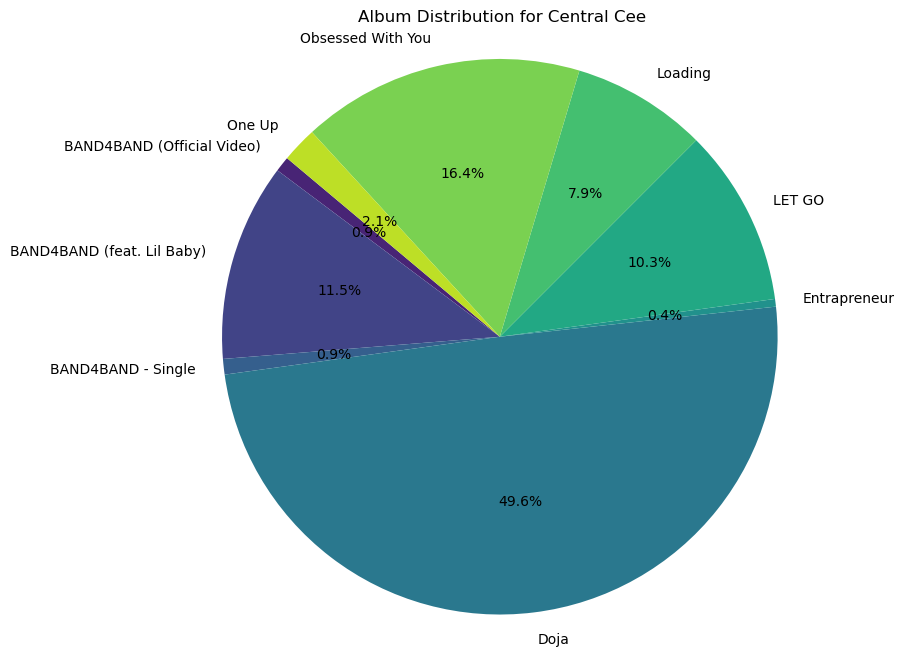

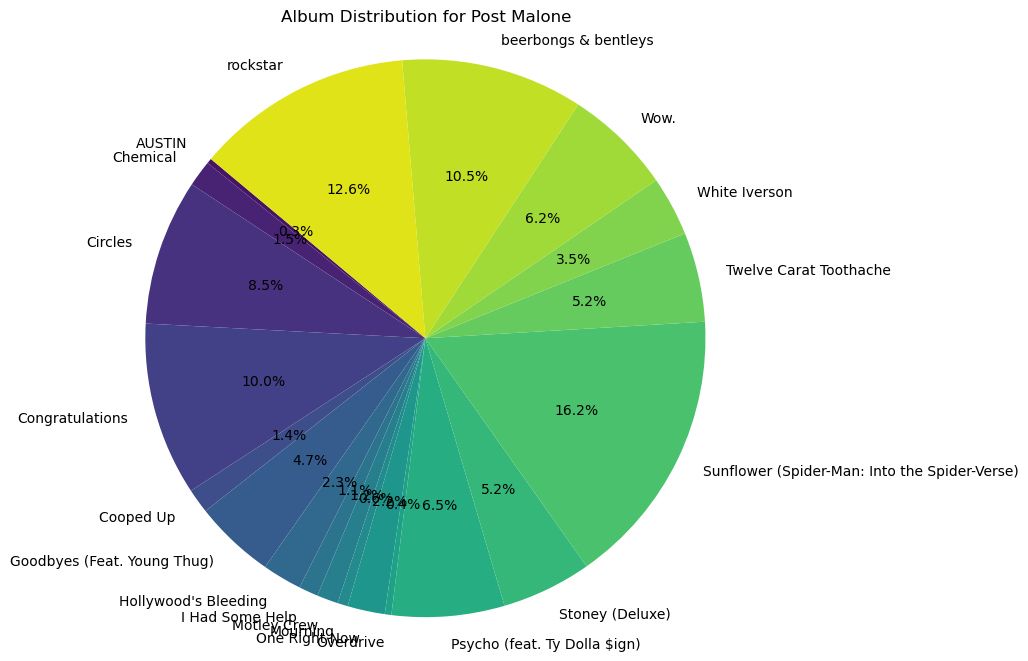

In [26]:
# Crear gráficos de pastel para los mejores álbumes de cada uno de los 10 mejores artistas
for artist in top_artists:
    artist_data = album_summary[album_summary['Artist'] == artist]
    create_pie_chart(artist_data['Total Views'], artist_data['Album Name'], f'Album Distribution for {artist}')

In [27]:
# Agrupar y resumir las métricas por artista y canción
track_summary = filtered_df.groupby(['Artist', 'Track', 'Release Date']).sum().reset_index()

# Agrupar y resumir las métricas por artista y álbum
album_summary = filtered_df.groupby(['Artist', 'Album Name', 'Release Date']).sum().reset_index()

# Seleccionar las métricas relevantes para cada plataforma
visualization_metrics = [
    'Spotify Streams', 'YouTube Views', 'TikTok Views',
    'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams'
]

# Crear una nueva columna con la suma de todas las visualizaciones/plataformas
track_summary['Total Views'] = track_summary[visualization_metrics].sum(axis=1)
album_summary['Total Views'] = album_summary[visualization_metrics].sum(axis=1)

# Asegurarse de que 'Release Date' está en datetime en los resúmenes
track_summary['Release Date'] = pd.to_datetime(track_summary['Release Date'], errors='coerce')
album_summary['Release Date'] = pd.to_datetime(album_summary['Release Date'], errors='coerce')

# Agrupar las visualizaciones por artista y fecha
artist_summary = track_summary.groupby(['Artist', 'Release Date'])['Total Views'].sum().reset_index()

# Resamplear por mes para ver la evolución mensual
artist_summary.set_index('Release Date', inplace=True)
artist_summary = artist_summary.groupby('Artist').resample('M')['Total Views'].sum().reset_index()

# Eliminar las filas donde 'Total Views' es 0
artist_summary = artist_summary[artist_summary['Total Views'] != 0]

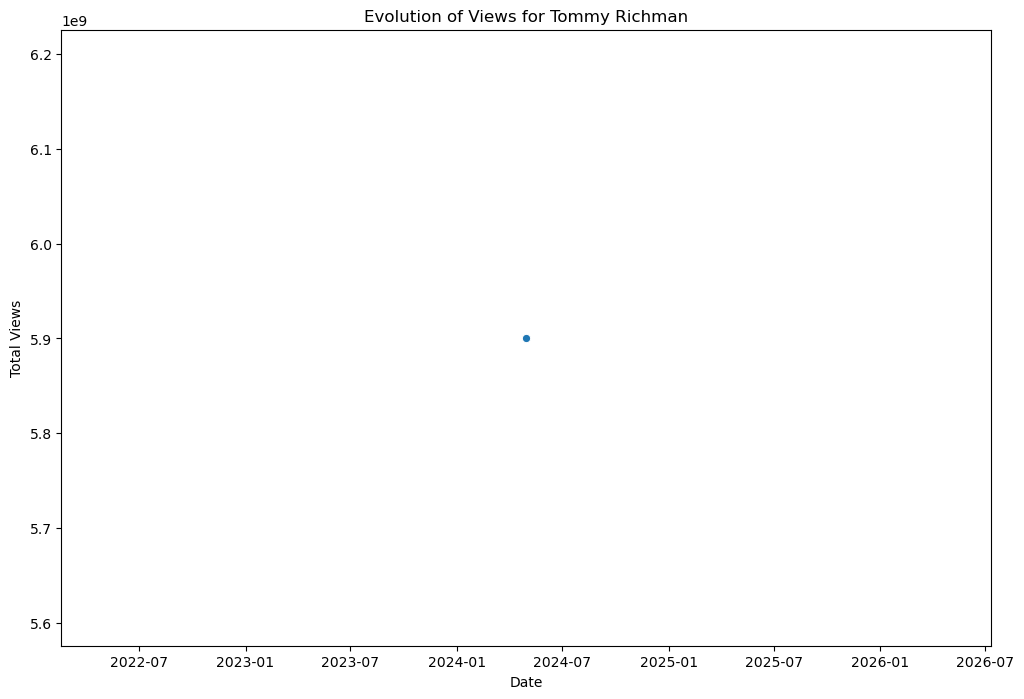

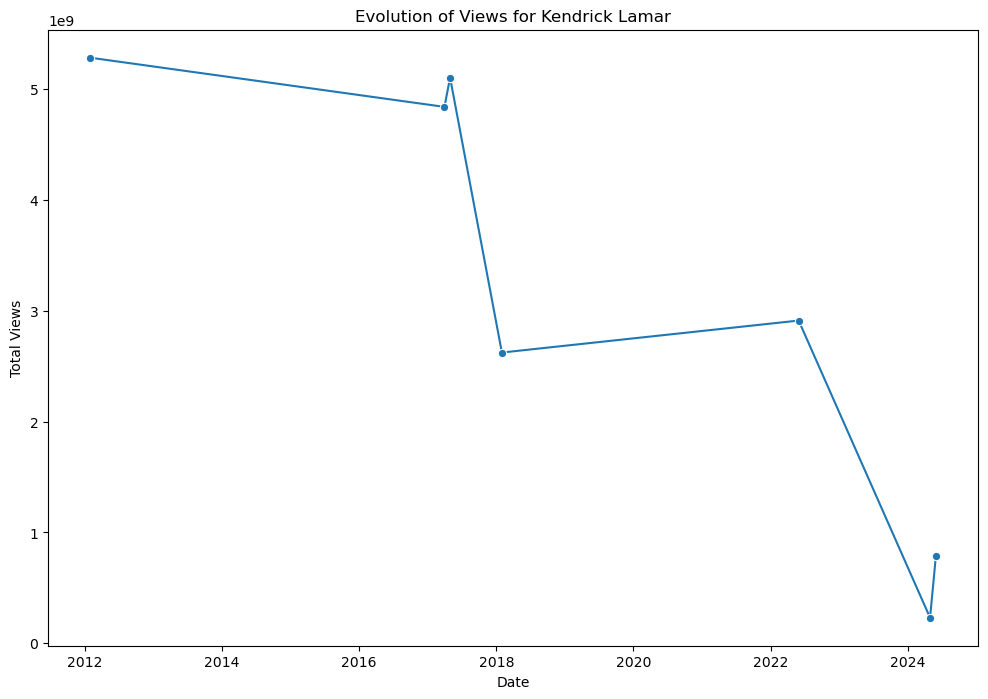

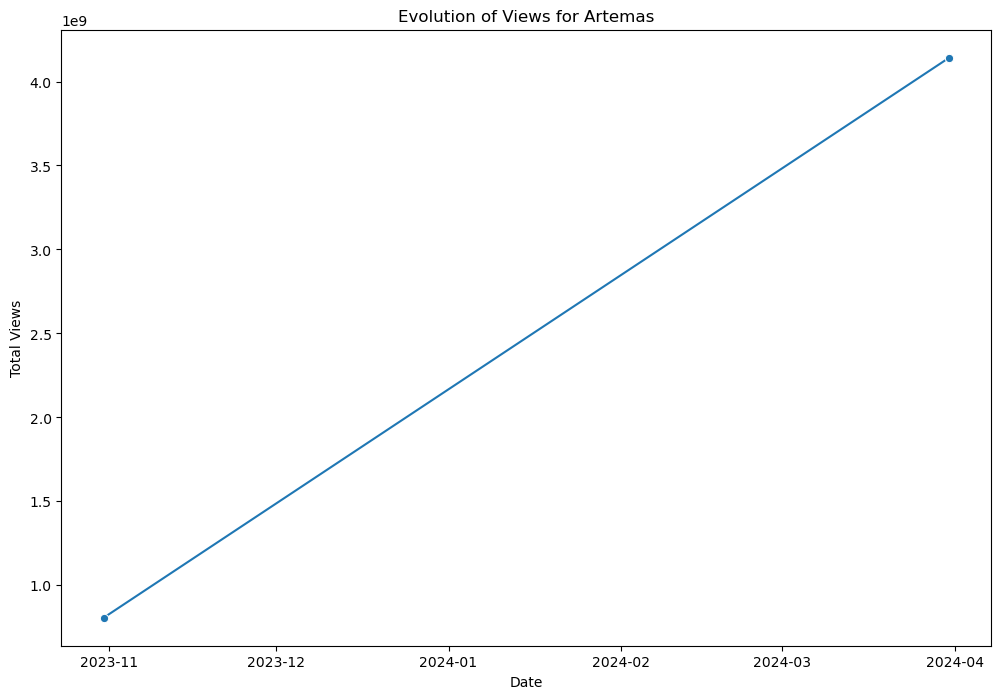

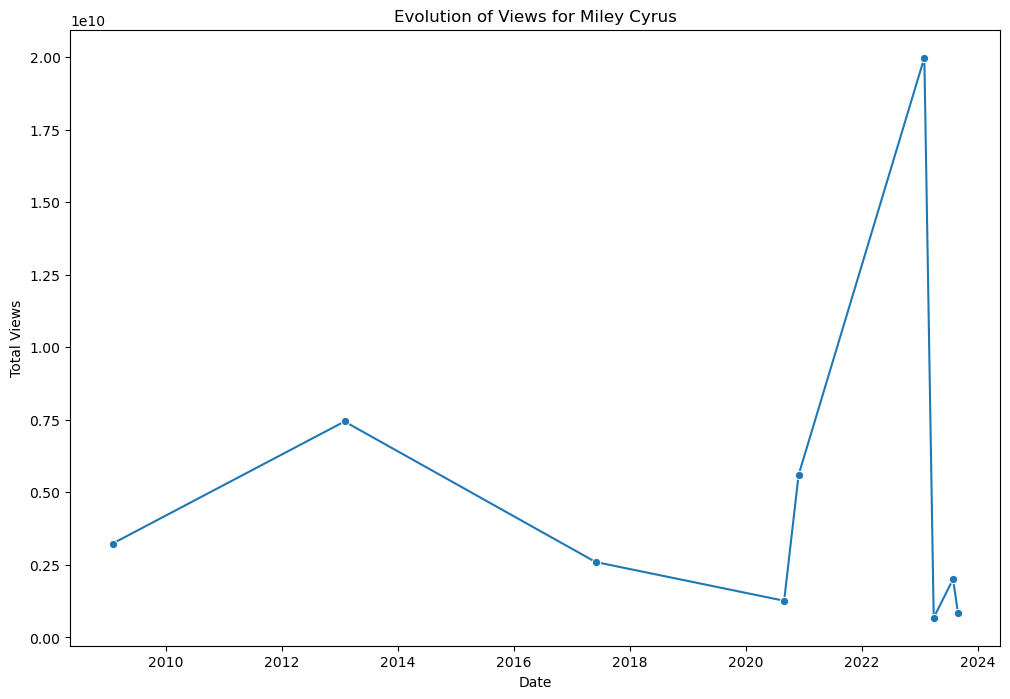

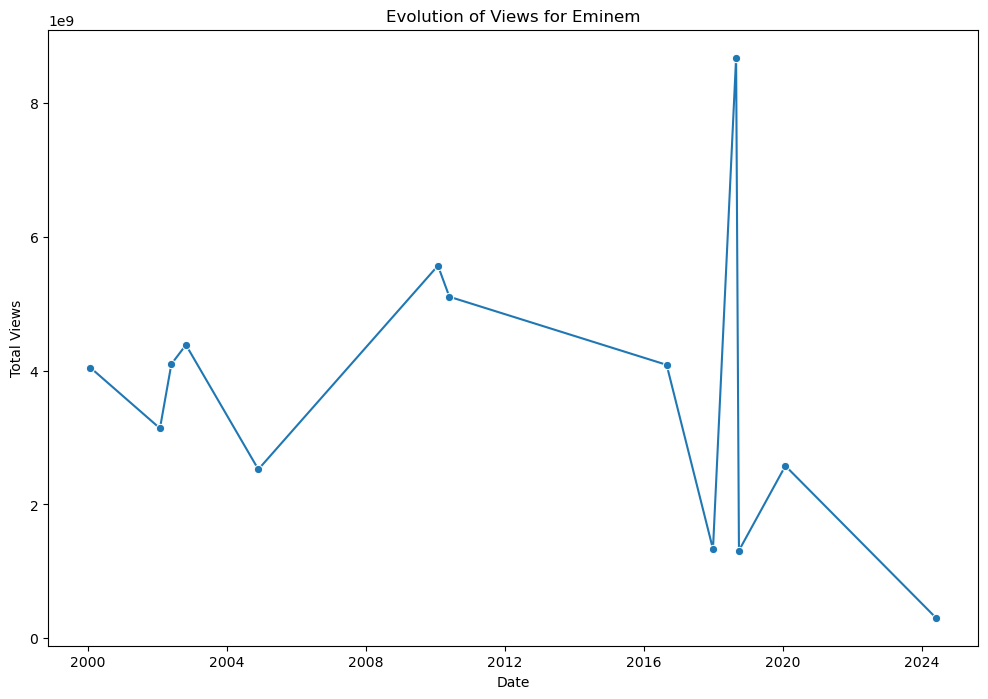

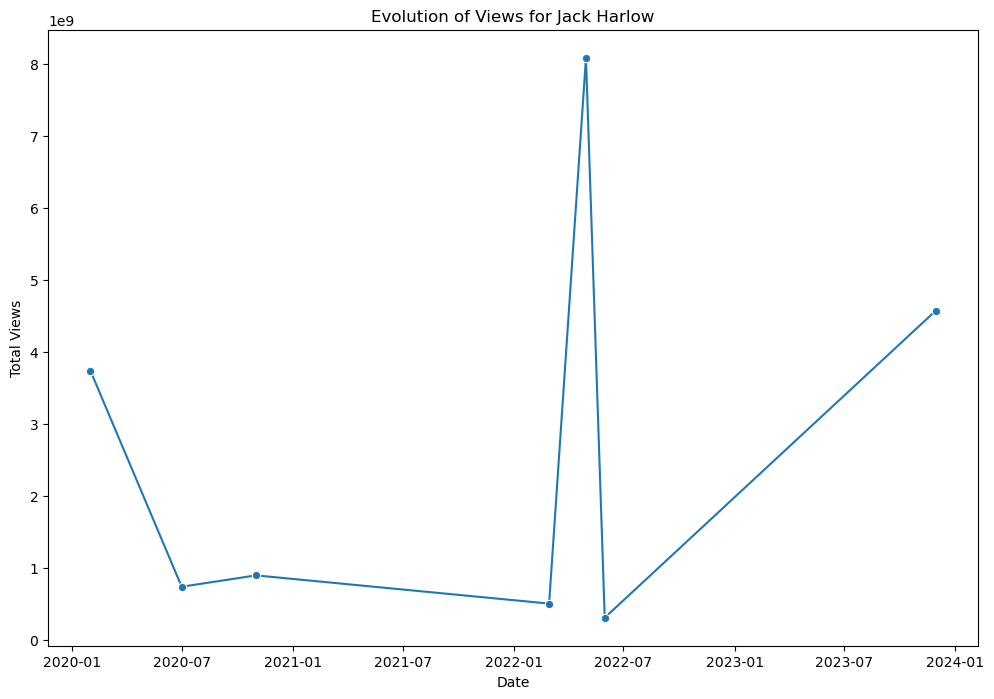

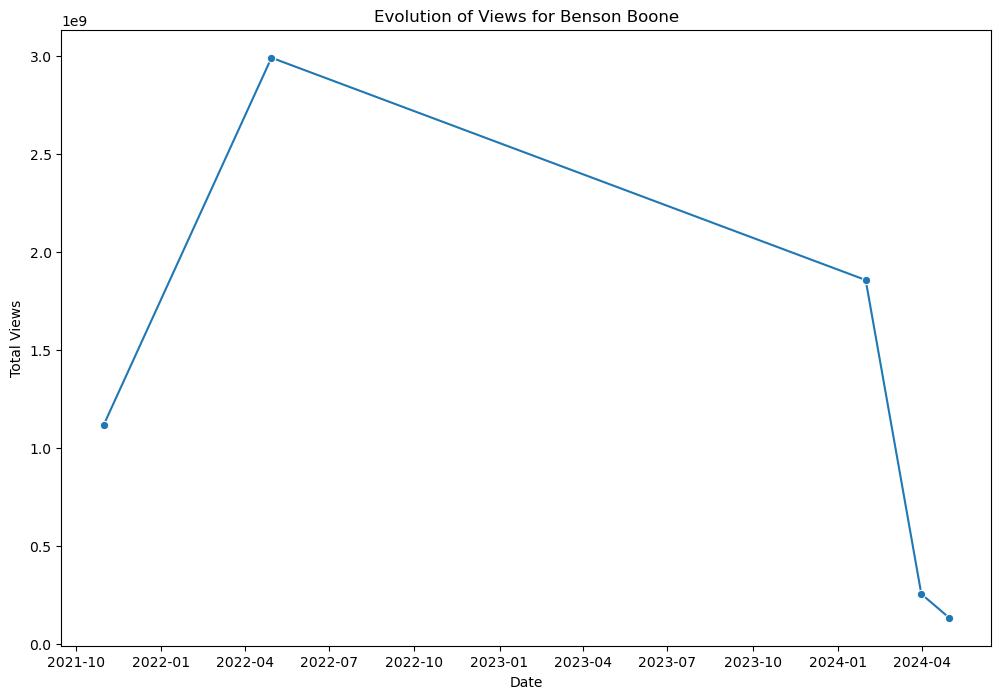

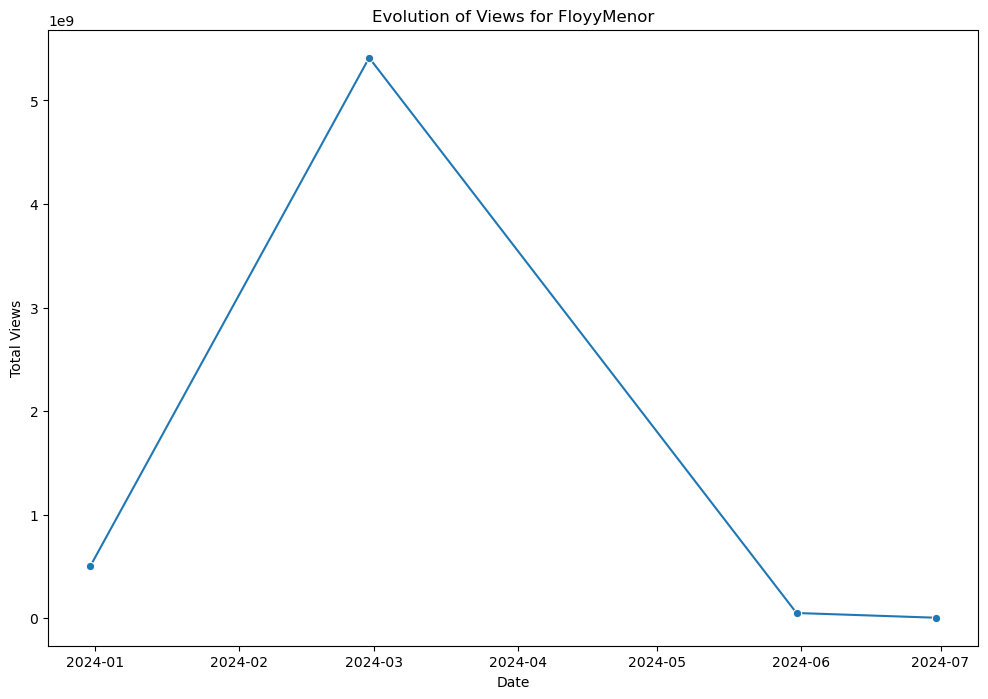

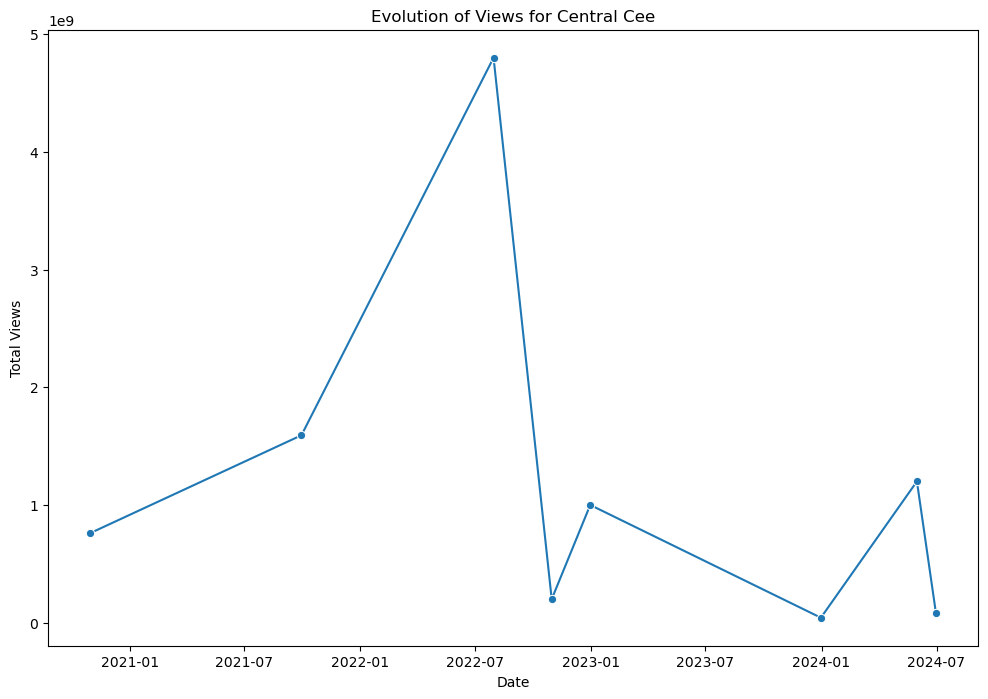

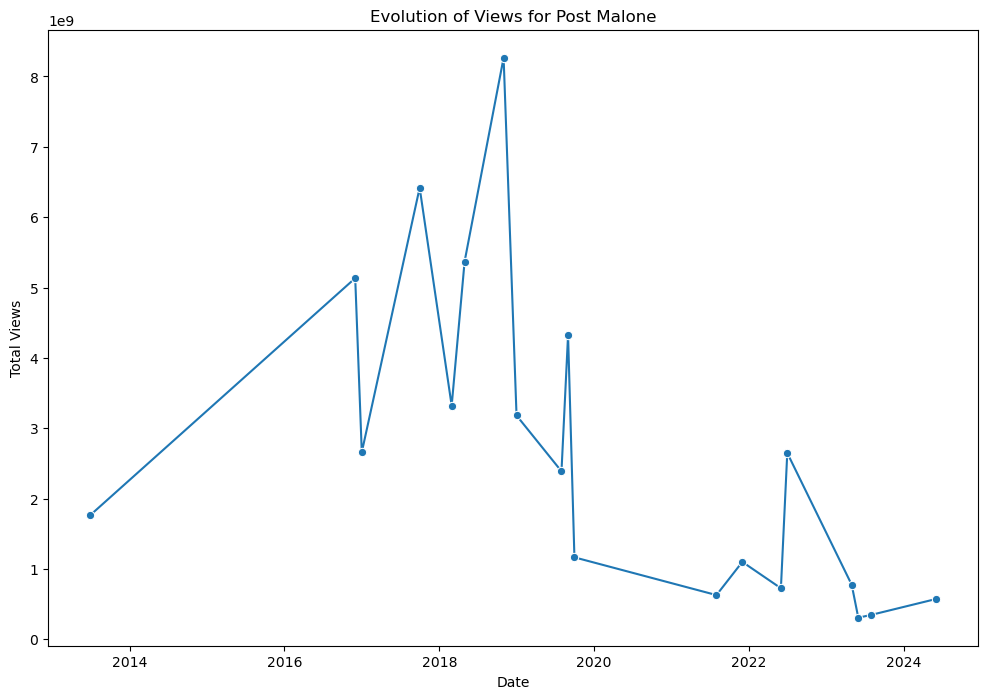

In [28]:
# Función para crear un gráfico de línea de tiempo de la evolución de visualizaciones
def create_artist_timeline_plot(data, artist, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    artist_data = data[data['Artist'] == artist]
    sns.lineplot(data=artist_data, x='Release Date', y='Total Views', marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Crear gráficos de línea de tiempo para la evolución de visualizaciones de cada uno de los 10 mejores artistas
for artist in top_artists:
    create_artist_timeline_plot(artist_summary, artist, f'Evolution of Views for {artist}', 'Date', 'Total Views')

In [29]:
df_cleaned = df.copy()
df_cleaned.to_csv('Most Streamed Spotify Songs 2024_cleaned.csv', index=False)

#### AHORA QUE TENEMOS LAS GRAFICAS CONVIRTAMOS LOS VALORES PARA SER USADOS EN MACHINE LEARNING Y ANALICEMOS SUS VALORES

#### NORMALIZANDO CON STANDARSCALER

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Cargar los datos limpios
df_cleaned = pd.read_csv('Most Streamed Spotify Songs 2024_cleaned.csv')

In [31]:
# Seleccionar las columnas numéricas
numeric_columns = [
    'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

df_numeric = df_cleaned[numeric_columns]

In [32]:
# Rellenar valores nulos con 0
df_numeric.fillna(0, inplace=True)

c:\Users\USER\miniconda3\envs\dspwp2\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
# Normalización usando StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)


In [34]:
# Concatenar las columnas no numéricas con las normalizadas
df_non_numeric = df_cleaned.drop(columns=numeric_columns)
df_final = pd.concat([df_non_numeric, df_normalized], axis=1)

# Guardar los datos normalizados
df_final.to_csv('Most Streamed Spotify Songs 2024_normalized.csv', index=False)


In [35]:
df_final.head(5)

,Track,Album Name,Artist,Release Date,ISRC,Explicit Track,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,False,-1.718789,17.392056,-0.119360,-0.423758,...,2.233095,-0.093008,1.207291,0.691728,5.153780,3.665610,-0.332580,-0.197085,0.016843,0.053932
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,True,-1.718034,12.822844,-0.240613,-0.459342,...,1.925531,-0.094547,-0.322774,0.789295,2.924390,3.548425,-0.397725,-0.173540,0.112648,-0.204189
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,False,-1.717279,12.631930,0.263532,-0.100937,...,1.953492,0.167697,0.874766,2.135730,10.970320,5.931191,-0.415293,-0.270935,0.143735,0.489311
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,False,-1.716524,10.251867,2.860428,2.844596,...,4.805444,11.112821,4.572985,4.633462,7.354976,7.415537,0.764919,0.573589,-0.238962,1.577328
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,True,-1.715770,9.702034,-0.634094,-0.744913,...,1.841650,-0.318011,-0.327267,1.081999,5.173012,3.314055,-0.418662,-0.265097,-0.227963,-0.314239


In [36]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, QuantileTransformer


#### NORMALIZANDO CON RobustScaler Y QuantileTransformer

In [37]:
# Cargar los datos limpios
df_cleaned = pd.read_csv('Most Streamed Spotify Songs 2024_cleaned.csv')


In [38]:
# Seleccionar las columnas numéricas
numeric_columns = [
    'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

df_numeric = df_cleaned[numeric_columns]


In [39]:
# Rellenar valores nulos con la media de cada columna
df_numeric.fillna(df_numeric.mean(), inplace=True)



c:\Users\USER\miniconda3\envs\dspwp2\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [40]:
# Normalización usando RobustScaler
scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)
# Normalización usando QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
df_quantile_transformed = pd.DataFrame(quantile_transformer.fit_transform(df_numeric), columns=numeric_columns)


In [41]:
# Concatenar las columnas no numéricas con las normalizadas
df_non_numeric = df_cleaned.drop(columns=numeric_columns)
df_robust_final = pd.concat([df_non_numeric, df_robust_scaled], axis=1)
df_quantile_final = pd.concat([df_non_numeric, df_quantile_transformed], axis=1)

# Guardar los datos normalizados
df_robust_final.to_csv('Most Streamed Spotify Songs 2024_robust_scaled.csv', index=False)
df_quantile_final.to_csv('Most Streamed Spotify Songs 2024_quantile_transformed.csv', index=False)


In [42]:
df_robust_final.head(5)

,Track,Album Name,Artist,Release Date,ISRC,Explicit Track,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,False,-0.983428,32.797170,0.215448,-0.066745,...,3.372549,0.515348,2.177795,1.456615,14.571409,4.638369,-0.282122,-0.083733,-1.068565e+07,0.579698
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,True,-0.982992,24.330189,0.099390,-0.097847,...,2.941176,0.511971,-1.341032,1.648275,8.487374,4.480474,-0.398227,-0.022753,-8.881029e+06,-0.072755
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,False,-0.982556,23.976415,0.581939,0.215422,...,2.980392,1.087123,1.413057,4.293182,30.444820,7.691001,-0.429539,-0.275004,-8.295453e+06,1.680206
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,False,-0.982119,19.566038,3.067592,2.790009,...,6.980392,25.091892,9.918179,9.199675,20.578499,9.691001,1.673911,1.912297,0.000000e+00,4.430383
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,True,-0.981683,18.547170,-0.277236,-0.347455,...,2.823529,0.021871,-1.351366,2.223255,14.623892,4.164685,-0.435543,-0.259883,-1.529692e+07,-0.350928


In [43]:
df_quantile_final.head(5)

,Track,Album Name,Artist,Release Date,ISRC,Explicit Track,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,False,-5.199338,5.199338,0.226395,-0.090701,...,1.750222,0.365701,1.651085,1.204935,2.396039,2.278625,-0.227224,-0.075382,-0.989781,0.357159
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,True,-3.480622,3.241402,0.106906,-0.132963,...,1.597698,0.364837,-1.926403,1.289578,2.003507,2.225823,-0.434601,-0.024564,-0.916301,-0.073965
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,False,-3.290386,3.229716,0.612120,0.223086,...,1.606755,0.868238,1.507009,1.852166,2.999520,3.040115,-0.520767,-0.459710,-0.901372,1.150558
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,False,-3.174538,3.111928,2.022129,2.045950,...,2.531968,3.143691,2.365296,2.307700,2.637182,5.199338,1.188301,1.397667,0.190587,1.762617
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,True,-3.090084,3.089961,-0.519669,-0.679771,...,1.562721,0.023832,-5.199338,1.442543,2.400573,2.108154,-0.544411,-0.390569,-1.854164,-0.487844


### ESCOGEMOS VARIABLE OBJETIVO Y ELIMINAMOS DATA IRRELEVANTE

In [44]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split

# Cargar los datos limpios
df_cleaned = pd.read_csv('Most Streamed Spotify Songs 2024_normalized.csv')

# Seleccionar la columna objetivo
y = df_cleaned['Explicit Track']

###### COMO BASICAMENTE NO PODEMOS APLICAR ONE HOT ENCODING YA ARTISTA NO ES UN VALOR REPRESENTATIVO, NOMBRE TAMPOCO, MUCHO MENOS ABUM, LA FECHA SI PODRIA SER REPRESENTATIVA SIN EMBARGO SI APLICAMOS ALGORITMOS PARA CONVERTIRLA EN NUMERICA TENDRIAMOS QUE AMPLIAR EL DF EN MUCHISIMAS COLUMNAS MAS.

In [45]:
# Eliminar las columnas categóricas del DataFrame
df_cleaned = df_cleaned.drop(columns=['Track', 'Album Name', 'Artist', 'ISRC', 'Release Date'])

In [46]:
df_cleaned.head(5)

,Explicit Track,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,False,-1.718789,17.392056,-0.119360,-0.423758,5.695375,1.392101,-0.448626,-0.241569,2.427624,...,2.233095,-0.093008,1.207291,0.691728,5.153780,3.665610,-0.332580,-0.197085,0.016843,0.053932
1,True,-1.718034,12.822844,-0.240613,-0.459342,4.969137,1.392101,-0.398907,0.149591,-0.012380,...,1.925531,-0.094547,-0.322774,0.789295,2.924390,3.548425,-0.397725,-0.173540,0.112648,-0.204189
2,False,-1.717279,12.631930,0.263532,-0.100937,6.188974,1.392101,-0.389215,-0.127856,1.113816,...,1.953492,0.167697,0.874766,2.135730,10.970320,5.931191,-0.415293,-0.270935,0.143735,0.489311
3,False,-1.716524,10.251867,2.860428,2.844596,3.715763,1.145953,1.119902,1.724949,3.108943,...,4.805444,11.112821,4.572985,4.633462,7.354976,7.415537,0.764919,0.573589,-0.238962,1.577328
4,True,-1.715770,9.702034,-0.634094,-0.744913,4.206881,1.251445,-0.459323,0.190049,-0.327765,...,1.841650,-0.318011,-0.327267,1.081999,5.173012,3.314055,-0.418662,-0.265097,-0.227963,-0.314239


In [47]:
# Seleccionar las columnas numéricas
numeric_columns = df_cleaned.columns.difference(['Explicit Track'])

# Reemplazar los valores nulos con la media de cada columna
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Normalización usando RobustScaler
scaler = RobustScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

In [48]:
# Dividir el conjunto de datos en características (X) y la columna objetivo (y)
X = df_cleaned.drop(columns=['Explicit Track'])

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los conjuntos de datos procesados
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


#### ENTRENAMIENTO CON REGRESION LOGISTICA

In [67]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve
import joblib
import matplotlib.pyplot as plt
import numpy as np


# Cargar los datos procesados
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

In [68]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [69]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.72125
Confusion Matrix:
[[478  47]
 [176  99]]
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.91      0.81       525
        True       0.68      0.36      0.47       275

    accuracy                           0.72       800
   macro avg       0.70      0.64      0.64       800
weighted avg       0.71      0.72      0.69       800



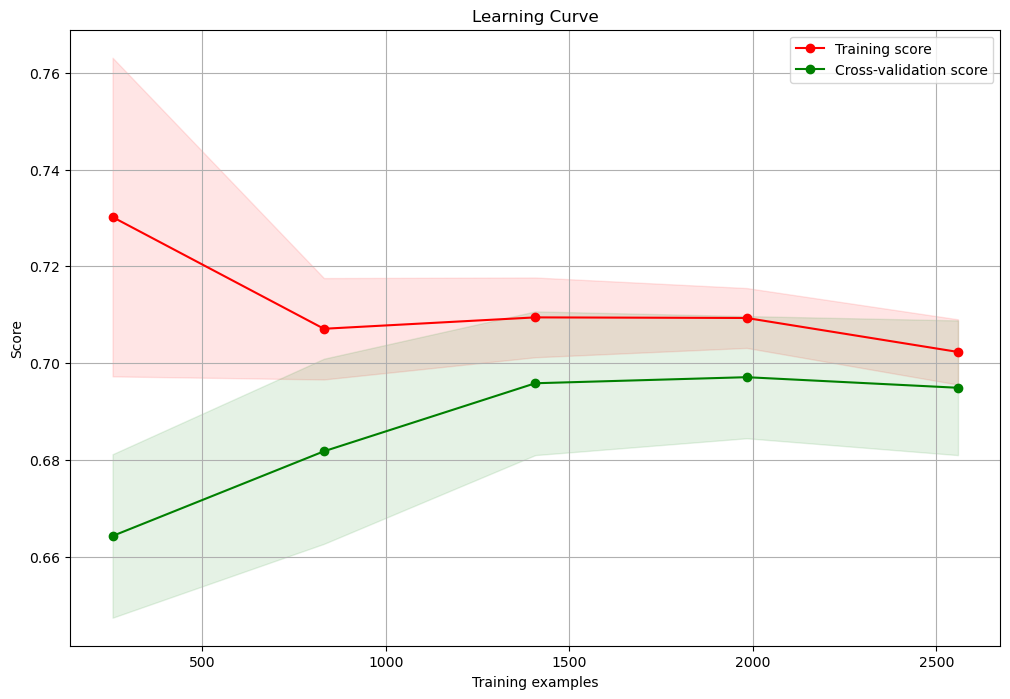

In [70]:
# Función para plotear la curva de aprendizaje
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(12, 8))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Visualizar la curva de aprendizaje
plot_learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [ ]:
# Guardar el modelo entrenado en un archivo
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']